In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sys
import os
import multiprocessing
import numpy as np
import ast
import importlib
from collections import Counter
import math
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
from scipy.stats import pearsonr

In [20]:
df = pd.read_csv('all_bootstrapped_v3.csv')

In [4]:
df

,ages,sample_no,sample_index,mean_infor,mean_logfreq
0,3-9,100,0,3.289338,6.284536
1,3-9,100,1,3.255210,6.275662
2,3-9,100,2,3.272207,6.311321
3,3-9,100,3,3.260396,6.268527
4,3-9,100,4,3.256225,6.260214
...,...,...,...,...,...
795,45-51,100,95,3.301410,6.333735
796,45-51,100,96,3.286202,6.338449
797,45-51,100,97,3.298132,6.325227
798,45-51,100,98,3.282511,6.333397


In [21]:
agebins_old = ['3-9', '9-15', '15-21', '21-27', '27-33', '33-39', '39-45','45-51']
agebins = ['3-9', '9-15', '15-21', '21-27', '27-33', '33-39', '39-45']
inclusive_labels = ['3-8', '9-14', '15-20', '21-26', '27-32', '33-38', '39-44']

#Subsetting df so that the last agebin is not included
df = df[df['ages'].isin(agebins)]

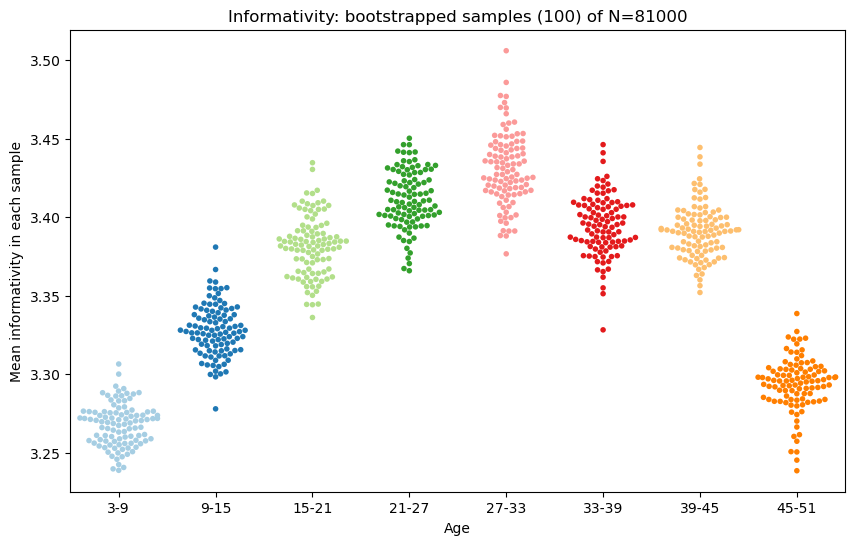

In [58]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='ages', y='mean_infor', hue='ages', data=df,size=4,palette="Paired")
plt.xlabel('Age')
plt.ylabel('Mean informativity in each sample')
plt.title('Informativity: bootstrapped samples (100) of N=81000')
plt.show()

In [4]:
phonemic_df =  pd.read_csv("aggregated_phoneme_data.csv")

In [7]:
summary['age_numeric'] = [6, 12, 18, 24, 30, 36, 42, 48]

In [8]:
summary

,age,mean_infor,mean_logfreq,age_numeric
0,3-9,3.268358,6.283519,6
1,9-15,3.328004,6.282854,12
2,15-21,3.382329,6.283217,18
3,21-27,3.411133,6.294626,24
4,27-33,3.430518,6.293826,30
5,33-39,3.396836,6.291534,36
6,39-45,3.397674,6.260634,42
7,45-51,3.293426,6.326629,48


In [16]:
phonemic_df

,phoneme,agebin,freq_values,info_values
0,aj,15-21,5.506654,3.898438
1,aj,21-27,5.396414,3.786530
2,aj,27-33,5.256256,3.733675
3,aj,3-9,5.370355,3.551077
4,aj,33-39,5.237079,3.691393
...,...,...,...,...
363,θ,3-9,7.685188,2.541509
364,θ,33-39,8.118413,3.071762
365,θ,39-45,7.948384,3.069891
366,θ,45-51,7.541303,2.439457


In [15]:
import glob
path = None #insert link to bootstrapBackendFolder  
all_files = glob.glob(os.path.join(path, "sample_*_age_*_phonemic.csv"))

dataframes = []

# Process each file
for file in all_files:
    # Extract the agebin from the filename
    agebin = file.split("_age_")[1].split("_phonemic")[0]
    sample_index = file.split('_')[1]
    # Read the CSV file
    loop_df = pd.read_csv(file)
    
    # Add an 'agebin' column
    loop_df['agebin'] = agebin
    loop_df['sample_index'] = sample_index
    # Append to the list of dataframes
    dataframes.append(loop_df)

# Combine all dataframes
combined_df = pd.concat(dataframes, ignore_index=True)

In [16]:
combined_df

,phoneme,freq_values,info_values,agebin,sample_index
0,b,5.221246,3.594990,3-9,0
1,i,3.934856,1.833825,3-9,0
2,d,4.530350,2.925577,3-9,0
3,ɑ,5.019323,3.671316,3-9,0
4,l,4.627446,2.826048,3-9,0
...,...,...,...,...,...
36782,g,8.255697,6.527356,33-39,99
36783,θ,8.140638,2.962072,33-39,99
36784,l̩,8.197021,2.665218,33-39,99
36785,ʒ,11.661689,3.924415,33-39,99


In [17]:
df

,ages,sample_no,sample_index,mean_infor,mean_logfreq
0,3-9,100,0,3.289338,6.284536
1,3-9,100,1,3.255210,6.275662
2,3-9,100,2,3.272207,6.311321
3,3-9,100,3,3.260396,6.268527
4,3-9,100,4,3.256225,6.260214
...,...,...,...,...,...
795,45-51,100,95,3.301410,6.333735
796,45-51,100,96,3.286202,6.338449
797,45-51,100,97,3.298132,6.325227
798,45-51,100,98,3.282511,6.333397


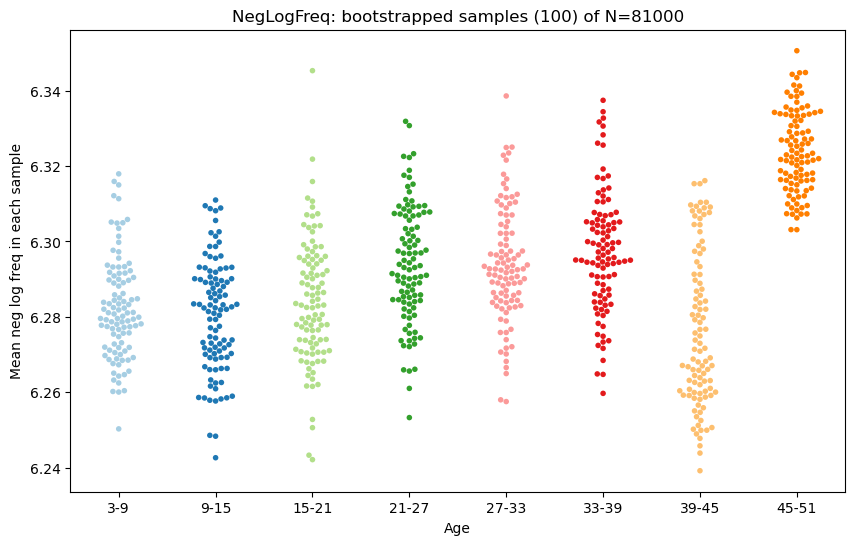

In [59]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='ages', y='mean_logfreq', hue='ages', data=df,size=4,palette="Paired")
plt.xlabel('Age')
plt.ylabel('Mean neg log freq in each sample')
plt.title('NegLogFreq: bootstrapped samples (100) of N=81000')
plt.show()

In [36]:
mean_infor_samples = []

for age in agebins:
    subset_age = df[df['ages'] == age]
    mean_infor_samples.append(subset_age['mean_infor'])

In [38]:
f_stat, pvalue = scipy.stats.f_oneway(*mean_infor_samples, axis=0)
k = 7  # Number of groups
N = 700  # Total number of observations
df_between = k - 1
df_within = N - k

# Calculate partial eta squared
eta_squared = (f_stat * df_between) / ((f_stat * df_between) + df_within)

In [39]:
print(f,pvalue,eta_squared)

929.0262419271198 0.0 0.8894235536036836


In [44]:
mean_logfreq_samples = []

for age in agebins:
    subset_age = df[df['ages'] == age]
    mean_logfreq_samples.append(subset_age['mean_logfreq'])
    
f_stat, pvalue = scipy.stats.f_oneway(*mean_logfreq_samples, axis=0)
k = 7  # Number of groups
N = 700  # Total number of observations
df_between = k - 1
df_within = N - k

# Calculate partial eta squared
eta_squared = (f_stat * df_between) / ((f_stat * df_between) + df_within)

In [45]:
print(f_stat,pvalue,eta_squared)

24.9357863569055 7.51617938657718e-27 0.17756005790100635


<Figure size 936x648 with 0 Axes>

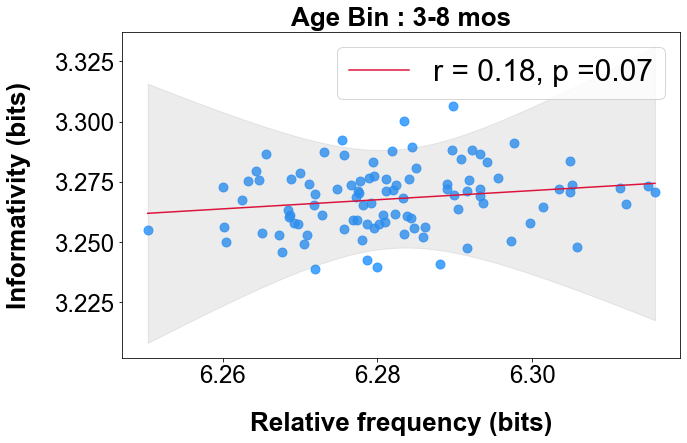

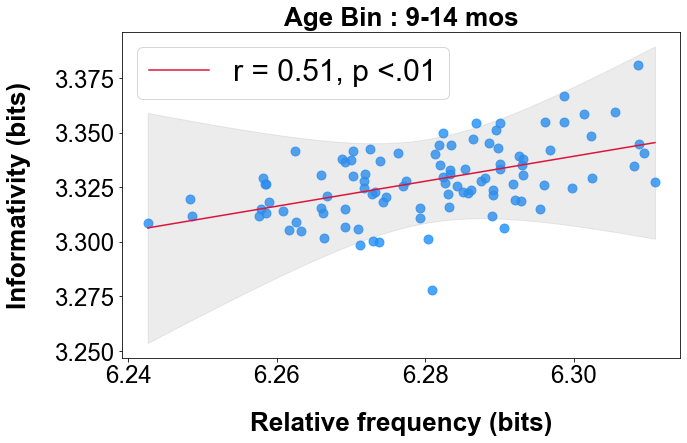

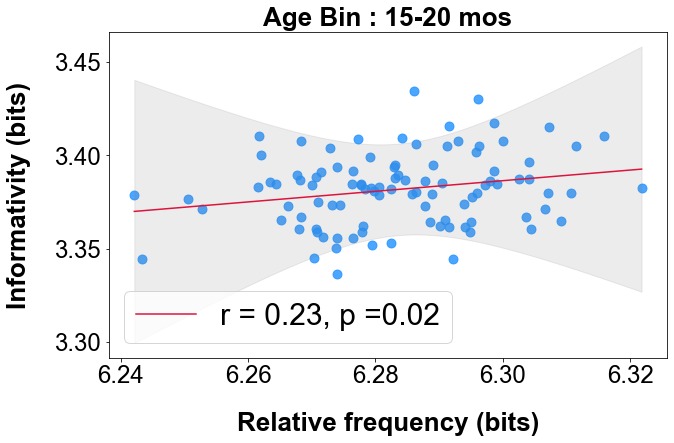

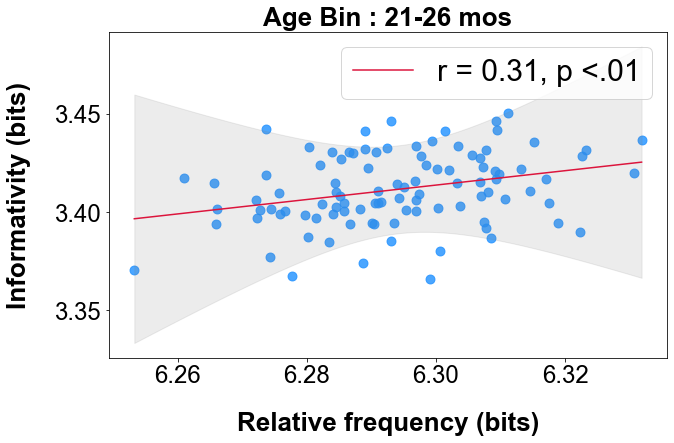

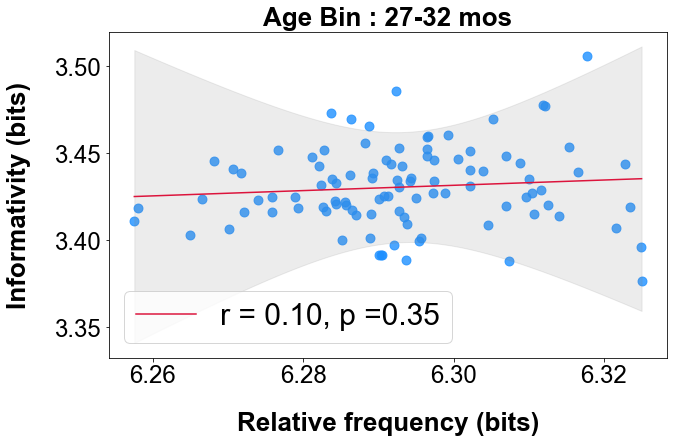

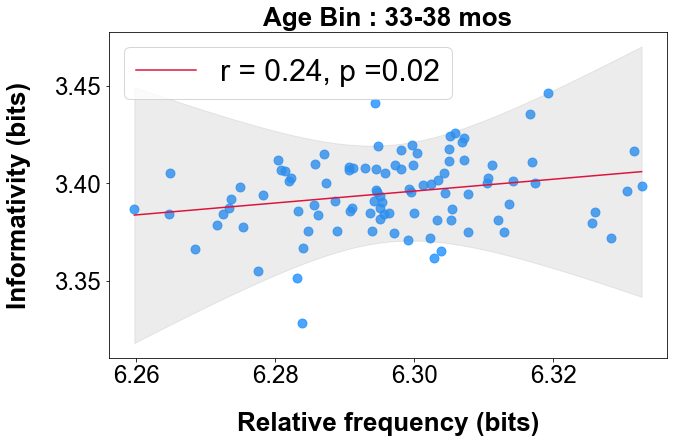

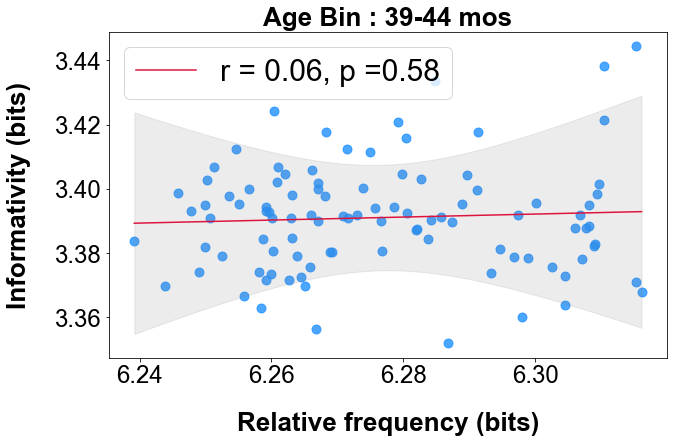

In [61]:
# NEW VERSION
from scipy.stats import linregress
myblue = "#1E90FF" 
myred =  "#DC143C" 
rvalues = []
nvalues = []
with plt.rc_context({
    'font.size': 30,        # General font size
    'axes.titlesize': 26,   # Font size for the title
    'axes.labelsize': 26,   # Font size for x and y labels
    'xtick.labelsize': 24,  # Font size for x-axis tick labels
    'ytick.labelsize': 24,  # Font size for y-axis tick labels
    'font.family': 'Arial'  # Font family
}):
    plt.figure(figsize=(13,9))
    
    for i in range(len(agebins)):
        age = agebins[i]
        inclusive_age = inclusive_labels[i]
        subset_age = filtered_data_logfreq[filtered_data_logfreq['ages'] == age]
        x = subset_age['mean_logfreq']
        y = subset_age['mean_infor']
        slope, intercept, r_value, p_value, std_err = linregress(subset_age['mean_logfreq'], subset_age['mean_infor'])
        #line = slope * x + intercept
        
        
        x_fit = np.linspace(min(x), max(x), 100)
        y_fit = slope * x_fit + intercept


        rounded_p = round(p_value,2)
        nvalues.append(len(subset_age))
        rvalues.append(r_value)
        
        plt.figure(figsize=(10, 6))
        plt.scatter(x, y, alpha=0.8,color=myblue,s=80)
        
        if rounded_p < 0.01:
            rounded_p = "<.01"
        else:
            rounded_p = "="+str(round(p_value,2))
            
            
        confidence = 1.96  # Approx for 95% confidence interval
        y_err = confidence * std_err * np.sqrt(1 / len(x) + (x_fit - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
        plt.fill_between(x_fit, y_fit - y_err, y_fit + y_err, color='gray', alpha=0.15)
            
        plt.plot(x_fit, y_fit, color=myred, label=f'r = {r_value:.2f}, p {rounded_p}')
        plt.title('Age Bin : '+ inclusive_age +' mos' , fontsize=26, fontweight='bold')
        plt.xlabel('Relative frequency (bits)', fontweight="bold",labelpad=24)
        plt.ylabel('Informativity (bits)', fontweight="bold",labelpad=24)
        plt.legend()
        plt.savefig('scatterplot_'+inclusive_age+'.pdf', format='pdf',bbox_inches='tight')
        plt.show()

In [188]:
np.mean(rvalues)

0.23147358652475483

In [190]:
np.std(rvalues)

0.13880792338325668

In [195]:
from scipy.stats import norm
def fisher_r_to_z(r):
    return np.arctanh(r)   

def compareFisher(r1,r2,n1,n2):
    z1 = fisher_r_to_z(r1)
    z2 = fisher_r_to_z(r2)

    # Standard error for the difference between two z-scores
    se_diff = np.sqrt(1/(n1 - 3) + 1/(n2 - 3))

    # Z-test statistic for comparing correlations
    z_score = (z1 - z2) / se_diff

    # Two-tailed p-value
    p_value = 2 * (1 - norm.cdf(abs(z_score)))
    print(f"Fisher Z for r1: {z1:.4f}")
    print(f"Fisher Z for r2: {z2:.4f}")
    print(f"Z-score for comparison: {z_score:.4f}")
    print(f"P-value: {p_value:.4f}")

In [197]:
for i in range(6):
    j=i+1
    print(agebins[i], agebins[j])
    compareFisher(rvalues[i],rvalues[j],nvalues[i],nvalues[j])
    print('\n')

3-9 9-15
Fisher Z for r1: 0.1849
Fisher Z for r2: 0.5620
Z-score for comparison: -2.6193
P-value: 0.0088


9-15 15-21
Fisher Z for r1: 0.5620
Fisher Z for r2: 0.2299
Z-score for comparison: 2.3064
P-value: 0.0211


15-21 21-27
Fisher Z for r1: 0.2299
Fisher Z for r2: 0.3191
Z-score for comparison: -0.6196
P-value: 0.5356


21-27 27-33
Fisher Z for r1: 0.3191
Fisher Z for r2: 0.0959
Z-score for comparison: 1.5507
P-value: 0.1210


27-33 33-39
Fisher Z for r1: 0.0959
Fisher Z for r2: 0.2463
Z-score for comparison: -1.0390
P-value: 0.2988


33-39 39-45
Fisher Z for r1: 0.2463
Fisher Z for r2: 0.0564
Z-score for comparison: 1.3154
P-value: 0.1884




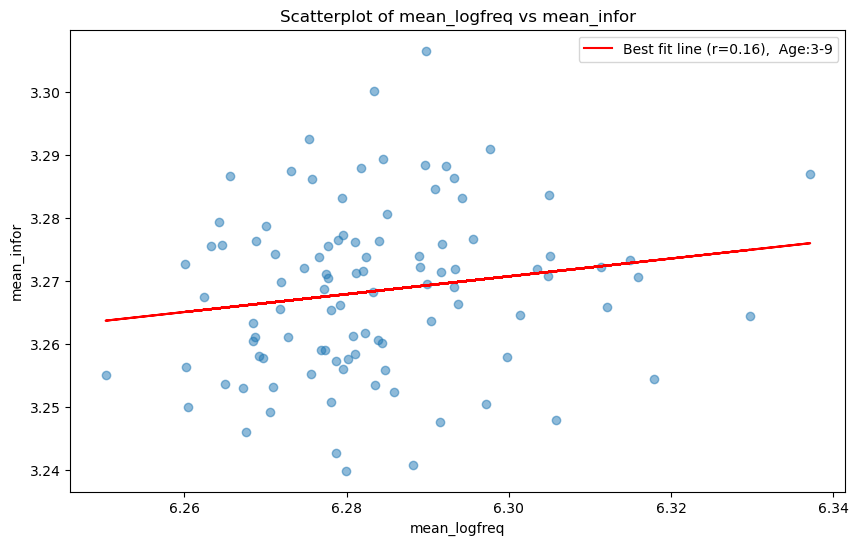

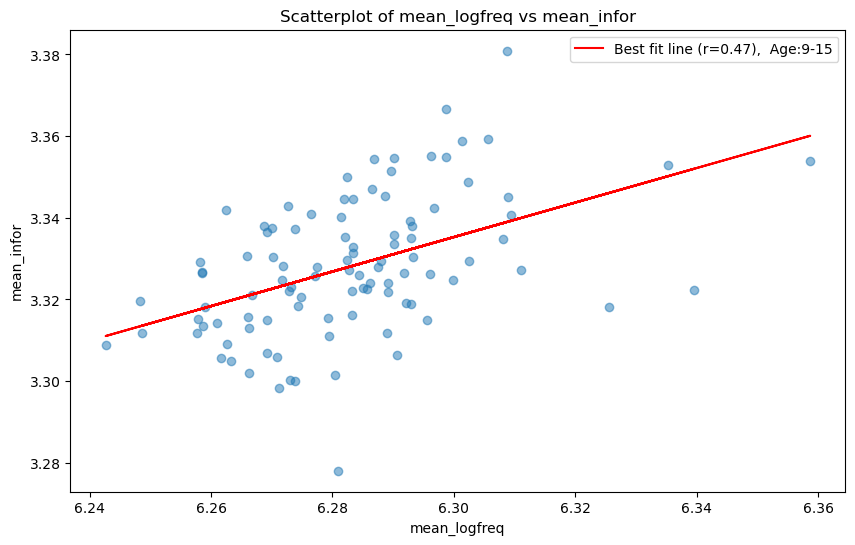

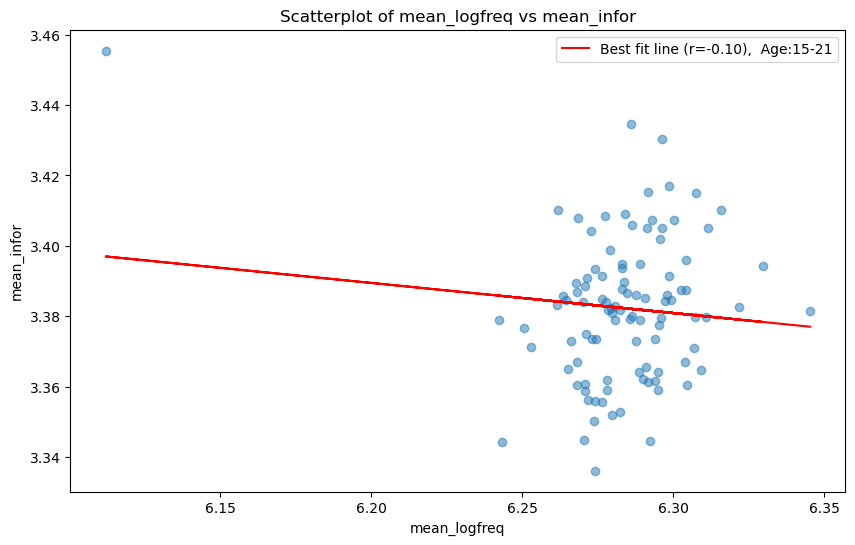

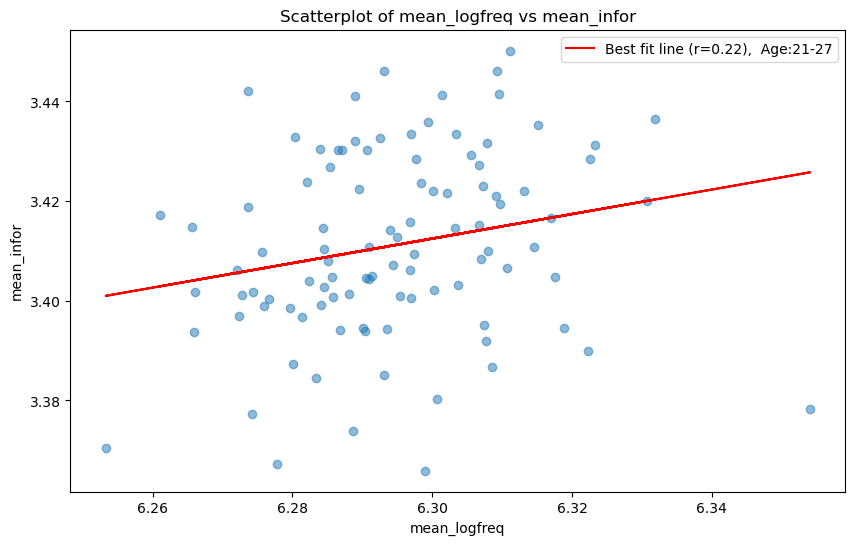

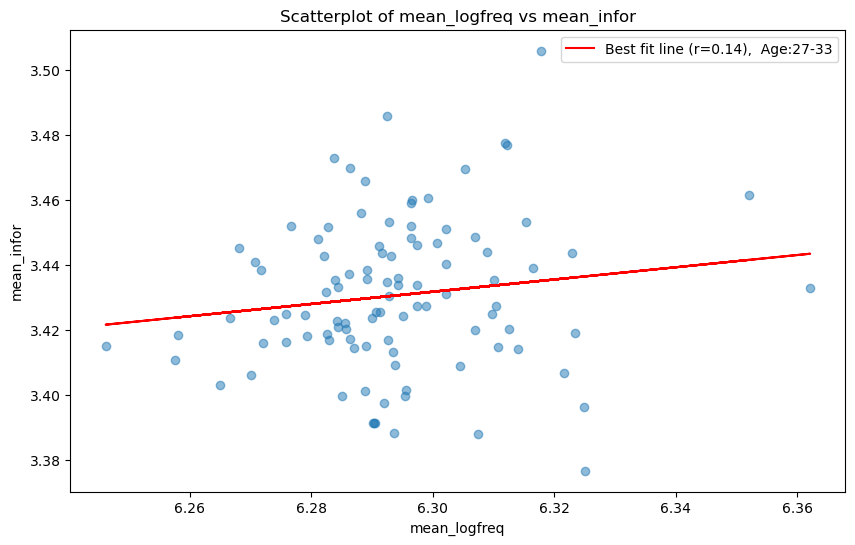

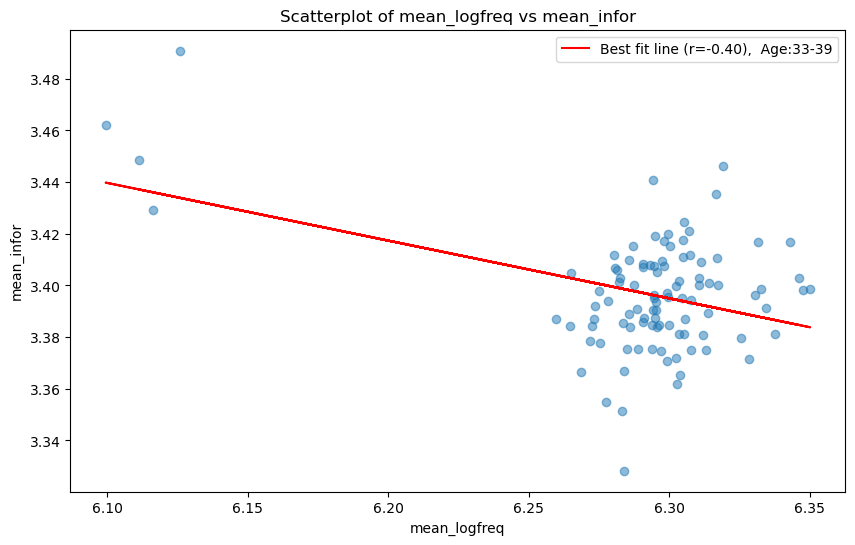

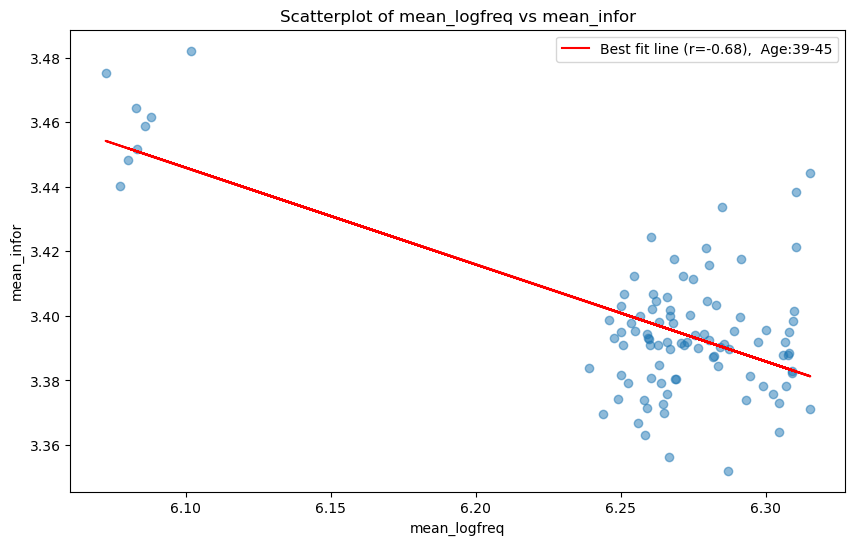

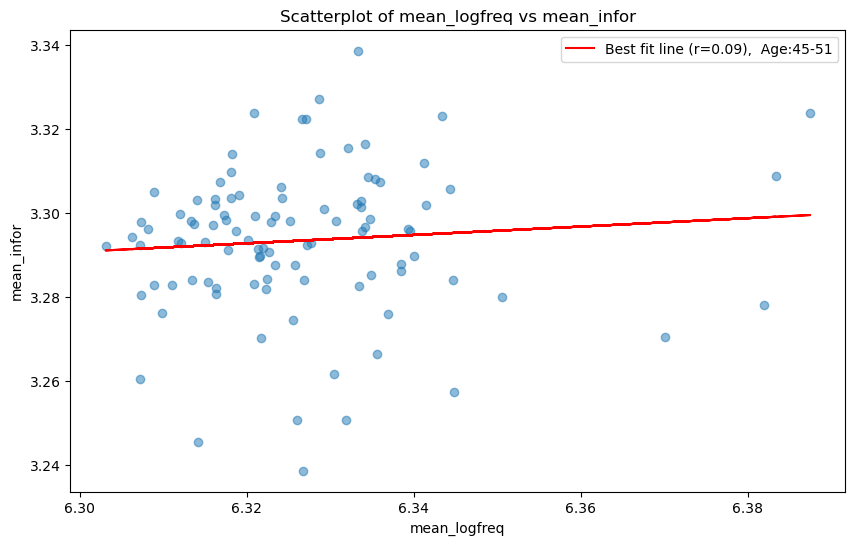

In [24]:
# OLD VERSION

from scipy.stats import linregress


for age in agebins:
    subset_age = df[df['ages'] == age]
    slope, intercept, r_value, p_value, std_err = linregress(subset_age['mean_logfreq'], subset_age['mean_infor'])
    line = slope * subset_age['mean_logfreq'] + intercept

    plt.figure(figsize=(10, 6))
    plt.scatter(subset_age['mean_logfreq'], subset_age['mean_infor'], alpha=0.5)
    plt.plot(subset_age['mean_logfreq'], line, color='red', label=f'Best fit line (r={r_value:.2f}),  Age:{age}')
    plt.title('Scatterplot of mean_logfreq vs mean_infor')
    plt.xlabel('mean_logfreq')
    plt.ylabel('mean_infor')
    plt.legend()
    plt.show()

In [66]:
print("SPEARMAN RANKED CORRELATION")
for age in agebins:
    subset_age = df[df['ages'] == age]
    print("AGE",  age, scipy.stats.spearmanr(a=subset_age['mean_logfreq'],b=subset_age['mean_infor']))

SPEARMAN RANKED CORRELATION
AGE 3-9 SignificanceResult(statistic=0.1673087308730873, pvalue=0.0961519805273376)
AGE 9-15 SignificanceResult(statistic=0.5035583558355835, pvalue=9.281809359186505e-08)
AGE 15-21 SignificanceResult(statistic=0.19680768076807678, pvalue=0.049695834461166905)
AGE 21-27 SignificanceResult(statistic=0.3091389138913891, pvalue=0.0017507054873415597)
AGE 27-33 SignificanceResult(statistic=0.1245244524452445, pvalue=0.21705399482877993)
AGE 33-39 SignificanceResult(statistic=0.19153915391539153, pvalue=0.05625880290327641)
AGE 39-45 SignificanceResult(statistic=0.009792979297929792, pvalue=0.9229639418675957)
AGE 45-51 SignificanceResult(statistic=0.09483348334833483, pvalue=0.3479724750183295)


## Outlier detection for graphing purposes

In [22]:
def remove_outliers_iqr(df, category_col, value_col):
    def iqr_outlier_filter(group):
        Q1 = group[value_col].quantile(0.25)
        Q3 = group[value_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return group[(group[value_col] >= lower_bound) & (group[value_col] <= upper_bound)]
    
    return df.groupby(category_col, group_keys=False).apply(iqr_outlier_filter)

# Remove outliers
filtered_data_infor = remove_outliers_iqr(df, 'ages', 'mean_infor')
filtered_data_logfreq = remove_outliers_iqr(df, 'ages', 'mean_logfreq')

In [166]:
filtered_data_logfreq

,ages,sample_no,sample_index,mean_infor,mean_logfreq
201,15-21,100,1,3.398861,6.279124
202,15-21,100,2,3.360447,6.267972
203,15-21,100,3,3.360596,6.304451
204,15-21,100,4,3.387494,6.304176
205,15-21,100,5,3.410144,6.315879
...,...,...,...,...,...
195,9-15,100,95,3.324834,6.299811
196,9-15,100,96,3.329334,6.288036
197,9-15,100,97,3.328086,6.271789
198,9-15,100,98,3.300279,6.273026


In [23]:
custom_palette = [
    "#1E90FF",  # Sky Blue
    "#DC143C",  # Crimson Red
    "#FFD700",  # Sunflower Yellow
    "#50C878",  # Emerald Green
    "#FF6347",  # Tangerine Orange
    "#7851A9",  # Royal Purple
    
    "#708090",   # Slate Gray,
    "#20B2AA"  # Cool Teal
]

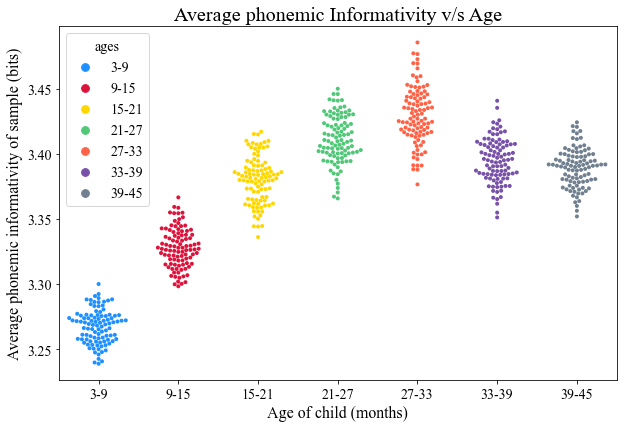

In [10]:
with plt.rc_context({
    'font.size': 14,        # General font size
    'axes.titlesize': 20,   # Font size for the title
    'axes.labelsize': 16,   # Font size for x and y labels
    'xtick.labelsize': 14,  # Font size for x-axis tick labels
    'ytick.labelsize': 14,  # Font size for y-axis tick labels
    'font.family': "Times New Roman"  # Font family
}):
      
    plt.figure(figsize=(10, 6.5))
    sns.swarmplot(x='ages', y='mean_infor', hue='ages', data=filtered_data_infor,size=4,order=agebins,palette=custom_palette,hue_order =agebins )
    plt.xlabel('Age of child (months)')
    plt.ylabel('Average phonemic informativity of sample (bits)')
    plt.title('Average phonemic Informativity v/s Age')
    
    plt.show()

findfont: Font family ['Nimbus Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Nimbus Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Nimbus Sans'] not found. Falling back to DejaVu Sans.


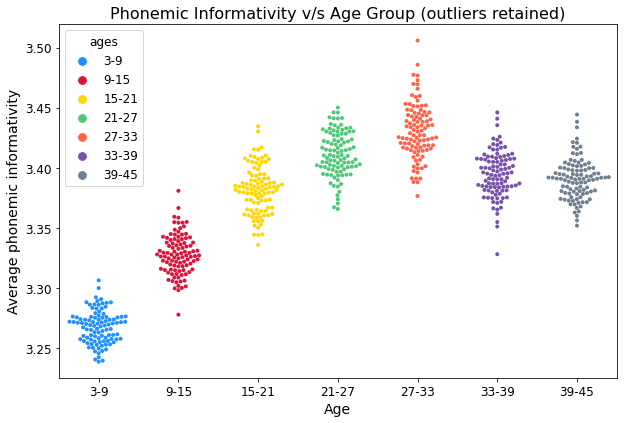

In [11]:
with plt.rc_context({
    'font.size': 12,        # General font size
    'axes.titlesize': 16,   # Font size for the title
    'axes.labelsize': 14,   # Font size for x and y labels
    'xtick.labelsize': 12,  # Font size for x-axis tick labels
    'ytick.labelsize': 12,  # Font size for y-axis tick labels
    'font.family': 'Nimbus Sans'  # Font family
}):
    plt.figure(figsize=(10, 6.5))
    sns.swarmplot(x='ages', y='mean_infor', hue='ages', data=df,size=4,palette=custom_palette,order=agebins,hue_order =agebins)
    plt.xlabel('Age')
    plt.ylabel('Average phonemic informativity')
    plt.title('Phonemic Informativity v/s Age Group (outliers retained)')
    plt.show()

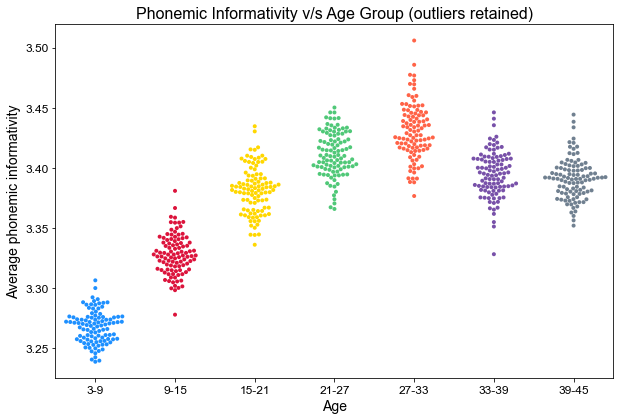

In [14]:
with plt.rc_context({
    'font.size': 12,        # General font size
    'axes.titlesize': 16,   # Font size for the title
    'axes.labelsize': 14,   # Font size for x and y labels
    'xtick.labelsize': 12,  # Font size for x-axis tick labels
    'ytick.labelsize': 12,  # Font size for y-axis tick labels
    'font.family': 'Arial'  # Font family
}):
    plt.figure(figsize=(10, 6.5))
    ax = sns.swarmplot(x='ages', y='mean_infor', hue='ages', data=df,size=4,palette=custom_palette,order=agebins,hue_order =agebins)
    plt.xlabel('Age')
    plt.ylabel('Average phonemic informativity')
    plt.title('Phonemic Informativity v/s Age Group (outliers retained)')
    ax.get_legend().remove()
    plt.show()

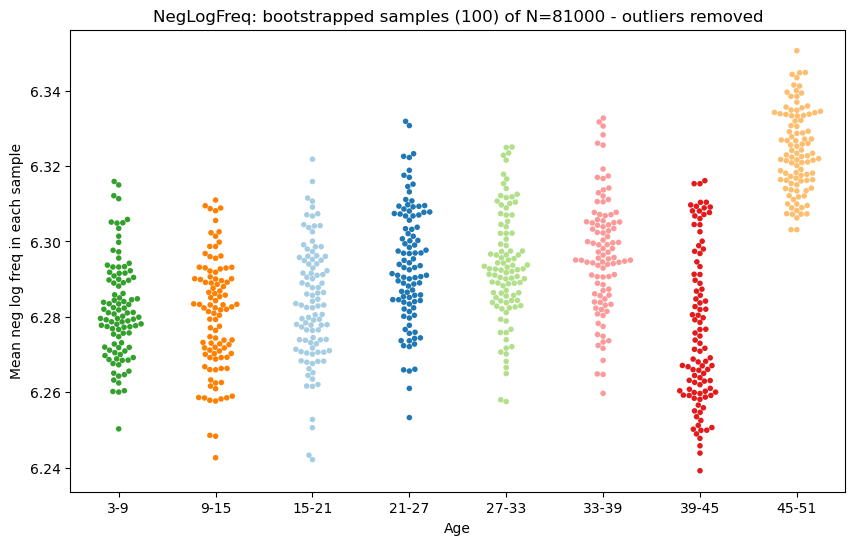

In [10]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='ages', y='mean_logfreq', hue='ages', data=filtered_data_logfreq,size=4,palette="Paired",order=agebins)
plt.xlabel('Age')
plt.ylabel('Mean neg log freq in each sample')
plt.title('NegLogFreq: bootstrapped samples (100) of N=81000 - outliers removed')
plt.show()

In [31]:
summary

,age,mean_infor,mean_logfreq,age_numeric
0,3-9,3.269390,6.282505,6
1,9-15,3.327602,6.280045,12
2,15-21,3.379148,6.282065,18
3,21-27,3.412403,6.294803,24
4,27-33,3.433168,6.293346,30
5,33-39,3.397531,6.293590,36
6,39-45,3.399076,6.255213,42
7,45-51,3.298050,6.328026,48


In [11]:
# Initialize an empty DataFrame for the correlation matrix
correlation_matrix = pd.DataFrame(index=[f'{age}.mean_infor' for age in agebins], 
                                  columns=[f'{age}.mean_logfreq' for age in agebins])

# Compute the correlation for each pair
for age1 in agebins:
    for age2 in agebins:
        subset1 = df[df['ages'] == age1].reset_index()
        subset2 = df[df['ages'] == age2].reset_index()

        correlation = subset1['mean_infor'].corr(subset2['mean_logfreq'])
        correlation_matrix.loc[f'{age1}.mean_infor', f'{age2}.mean_logfreq'] = correlation

In [12]:
def giveOutlierFreeDf(age1):
        subset1 = df[df['ages'] ==  age1] 
        variable1 = 'mean_infor'
        variable2 = 'mean_logfreq'

        Q1 = subset1[variable1].quantile(0.25)
        Q3 = subset1[variable1].quantile(0.75)
        IQR = Q3 - Q1
        outliers_variable1 = subset1[(subset1[variable1] < (Q1 - 1.5 * IQR)) | (subset1[variable1] > (Q3 + 1.5 * IQR))]

        Q1 = subset1[variable2].quantile(0.25)
        Q3 = subset1[variable2].quantile(0.75)
        IQR = Q3 - Q1
        outliers_variable2 = subset1[(subset1[variable2] < (Q1 - 1.5 * IQR)) | (subset1[variable2] > (Q3 + 1.5 * IQR))]

        combined_outliers = pd.concat([outliers_variable1, outliers_variable2]).drop_duplicates()
        outlier_free_subset1 = subset1.drop(combined_outliers.index, errors='ignore')
        
        return outlier_free_subset1

In [13]:
correlations = {}

# Compute correlation and p-values for each pair
for age1 in agebins:
    for age2 in agebins:
        array1 = df[df['ages'] == age1]['mean_infor'] 
        array2 = df[df['ages'] == age2]['mean_logfreq'] 
        corr, p_value = pearsonr(array1, array2)
        correlations[(age1, age2)] = (corr, p_value)
        
# Display the dictionary of correlations and p-values
for key, value in correlations.items():
    print(f"Age pair: {key}, Correlation: {value[0]:.4f}, P-value: {value[1]:.4f}")

Age pair: ('3-9', '3-9'), Correlation: 0.1489, P-value: 0.1394
Age pair: ('3-9', '9-15'), Correlation: 0.0043, P-value: 0.9661
Age pair: ('3-9', '15-21'), Correlation: 0.0004, P-value: 0.9965
Age pair: ('3-9', '21-27'), Correlation: -0.0121, P-value: 0.9051
Age pair: ('3-9', '27-33'), Correlation: 0.1380, P-value: 0.1710
Age pair: ('3-9', '33-39'), Correlation: -0.0169, P-value: 0.8677
Age pair: ('3-9', '39-45'), Correlation: 0.2311, P-value: 0.0207
Age pair: ('3-9', '45-51'), Correlation: 0.0160, P-value: 0.8746
Age pair: ('9-15', '3-9'), Correlation: -0.1006, P-value: 0.3195
Age pair: ('9-15', '9-15'), Correlation: 0.5095, P-value: 0.0000
Age pair: ('9-15', '15-21'), Correlation: -0.0647, P-value: 0.5228
Age pair: ('9-15', '21-27'), Correlation: -0.2032, P-value: 0.0426
Age pair: ('9-15', '27-33'), Correlation: 0.0590, P-value: 0.5600
Age pair: ('9-15', '33-39'), Correlation: -0.1682, P-value: 0.0944
Age pair: ('9-15', '39-45'), Correlation: 0.1709, P-value: 0.0890
Age pair: ('9-15',

In [14]:
# Initialize empty DataFrames
unique_ages = agebins
corr_matrix = pd.DataFrame(index=unique_ages, columns=unique_ages, dtype=float)
p_value_matrix = pd.DataFrame(index=unique_ages, columns=unique_ages, dtype=float)

# Fill the matrices
for (age1, age2), (corr, p_value) in correlations.items():
    corr_matrix.loc[age1, age2] = corr
    p_value_matrix.loc[age1, age2] = p_value

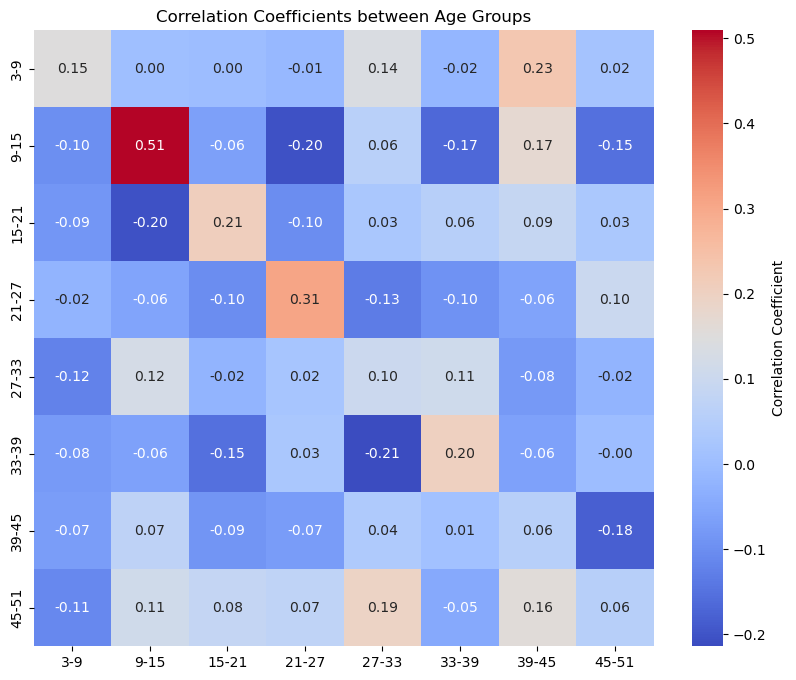

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Coefficients between Age Groups')
plt.show()

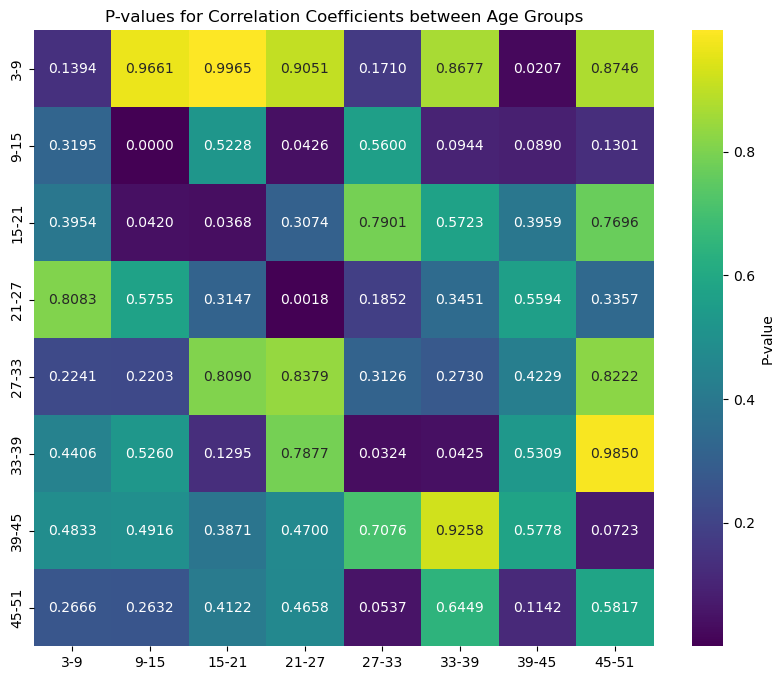

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(p_value_matrix, annot=True, fmt=".4f", cmap='viridis', cbar_kws={'label': 'P-value'})
plt.title('P-values for Correlation Coefficients between Age Groups')
plt.show()

In [99]:
''' subset1 = df[df['ages'] ==  '39-45'] 
variable1= 'mean_infor'
variable2 = 'mean_logfreq'

Q1 = subset1[variable1].quantile(0.25)
Q3 = subset1[variable1].quantile(0.75)
IQR = Q3 - Q1
outliers_variable1 = subset1[(subset1[variable1] < (Q1 - 1.5 * IQR)) | (subset1[variable1] > (Q3 + 1.5 * IQR))]

Q1 = subset1[variable2].quantile(0.25)
Q3 = subset1[variable2].quantile(0.75)
IQR = Q3 - Q1
outliers_variable2 = subset1[(subset1[variable2] < (Q1 - 1.5 * IQR)) | (subset1[variable2] > (Q3 + 1.5 * IQR))]

combined_outliers = pd.concat([outliers_variable1, outliers_variable2]).drop_duplicates()
outlier_free_subset = subset1.drop(combined_outliers.index, errors='ignore')'''


" subset1 = df[df['ages'] ==  '39-45'] \nvariable1= 'mean_infor'\nvariable2 = 'mean_logfreq'\n\nQ1 = subset1[variable1].quantile(0.25)\nQ3 = subset1[variable1].quantile(0.75)\nIQR = Q3 - Q1\noutliers_variable1 = subset1[(subset1[variable1] < (Q1 - 1.5 * IQR)) | (subset1[variable1] > (Q3 + 1.5 * IQR))]\n\nQ1 = subset1[variable2].quantile(0.25)\nQ3 = subset1[variable2].quantile(0.75)\nIQR = Q3 - Q1\noutliers_variable2 = subset1[(subset1[variable2] < (Q1 - 1.5 * IQR)) | (subset1[variable2] > (Q3 + 1.5 * IQR))]\n\ncombined_outliers = pd.concat([outliers_variable1, outliers_variable2]).drop_duplicates()\noutlier_free_subset = subset1.drop(combined_outliers.index, errors='ignore')"

In [82]:
correlations_age_only = {}

# Compute correlation and p-values for each pair
for age1 in agebins:
        subdf = df
        array1 = subdf[subdf['ages'] == age1]['mean_infor'] 
        array2 = subdf[subdf['ages'] == age1]['mean_logfreq'] 
        corr, p_value = pearsonr(array1, array2)
        correlations_age_only[(age1, age1)] = (corr, p_value)
        
# Display the dictionary of correlations and p-values
for key, value in correlations_age_only.items():
    print(f"Age pair: {key}, Correlation: {value[0]:.4f}, P-value: {value[1]:.4f}")

Age pair: ('3-9', '3-9'), Correlation: 0.1489, P-value: 0.1394
Age pair: ('9-15', '9-15'), Correlation: 0.5095, P-value: 0.0000
Age pair: ('15-21', '15-21'), Correlation: 0.2092, P-value: 0.0368
Age pair: ('21-27', '21-27'), Correlation: 0.3087, P-value: 0.0018
Age pair: ('27-33', '27-33'), Correlation: 0.1020, P-value: 0.3126
Age pair: ('33-39', '33-39'), Correlation: 0.2033, P-value: 0.0425
Age pair: ('39-45', '39-45'), Correlation: 0.0563, P-value: 0.5778
Age pair: ('45-51', '45-51'), Correlation: 0.0558, P-value: 0.5817


## Post hoc analysis for ANOVA

First, trying a Bonferroni correction

### Bonferroni - log freq

In [83]:
import scipy.stats as stats
import pandas as pd


results = []
for i in range(len(agebins)):
    for j in range(i + 1, len(agebins)):
        data1 = df[df['ages'] == agebins[i]]['mean_logfreq']
        data2 = df[df['ages'] == agebins[j]]['mean_logfreq']
        stat, p = stats.ttest_ind(data1, data2)
        
        bonferroni_alpha = 0.05 / 7 #changed to 7
        significant = p < bonferroni_alpha
        mean_diff = data1.mean() - data2.mean() 
        results.append((agebins[i], agebins[j], stat, p, mean_diff,significant))

# Convert results to DataFrame for easier viewing
bonfresults_df = pd.DataFrame(results, columns=['Group 1', 'Group 2', 'Statistic', 'P-value', 'Group1-Group2 Mean','Significant'])
print(bonfresults_df)


   Group 1 Group 2  Statistic       P-value  Group1-Group2 Mean  Significant
0      3-9    9-15   0.994716  3.210883e-01            0.001992        False
1      3-9   15-21  -0.826807  4.093417e-01           -0.001767        False
2      3-9   21-27  -5.704436  4.204753e-08           -0.011747         True
3      3-9   27-33  -5.576035  7.992806e-08           -0.011332         True
4      3-9   33-39  -7.177979  1.391461e-11           -0.015016         True
5      3-9   39-45   2.429986  1.599105e-02            0.005927        False
6      3-9   45-51 -23.914157  2.694366e-60           -0.041486         True
7     9-15   15-21  -1.691958  9.222715e-02           -0.003759        False
8     9-15   21-27  -6.399157  1.105993e-09           -0.013739         True
9     9-15   27-33  -6.281599  2.085280e-09           -0.013324         True
10    9-15   33-39  -7.807672  3.313024e-13           -0.017008         True
11    9-15   39-45   1.565385  1.190894e-01            0.003935        False

In [13]:
results = []
for i in range(len(agebins)-1):
        data1 = df[df['ages'] == agebins[i]]['mean_logfreq']
        data2 = df[df['ages'] == agebins[i+1]]['mean_logfreq']
        stat, p = stats.ttest_ind(data1, data2)
        
        bonferroni_alpha = 0.05 / 6 #changed to 7
        significant = p < bonferroni_alpha
        mean_diff = data1.mean() - data2.mean() 
        results.append((agebins[i], agebins[i+1], stat, p, mean_diff,significant))

# Convert results to DataFrame for easier viewing
bonfresults_df_rf = pd.DataFrame(results, columns=['Group 1', 'Group 2', 'Statistic', 'P-value', 'Group1-Group2 Mean','Significant'])
print(bonfresults_df_rf)

  Group 1 Group 2  Statistic       P-value  Group1-Group2 Mean  Significant
0     3-9    9-15   0.994716  3.210883e-01            0.001992        False
1    9-15   15-21  -1.691958  9.222715e-02           -0.003759        False
2   15-21   21-27  -4.391026  1.835211e-05           -0.009980         True
3   21-27   27-33   0.190696  8.489594e-01            0.000415        False
4   27-33   33-39  -1.670242  9.645161e-02           -0.003684        False
5   33-39   39-45   8.100970  5.504999e-14            0.020943         True


In [14]:
bonfresults_df_rf['P-value'] = bonfresults_df_rf['P-value'].apply(lambda x: f"{x:.2e}")
bonfresults_df_rf['Statistic'] = bonfresults_df_rf['Statistic'].round(2)
bonfresults_df_rf['Group1-Group2 Mean'] = bonfresults_df_rf['Group1-Group2 Mean'].round(2)
#print(bonfresults_df_rf.to_latex(index=False))

In [15]:
bonfresults_df_rf['Statistic']
bonfresults_df_rf['Group1-Group2 Mean']
bonfresults_df_rf['Significant']

0    False
1    False
2     True
3    False
4    False
5     True
Name: Significant, dtype: bool

### Bonferroni - informativity

In [12]:
import scipy.stats as stats

In [72]:
results = []
for i in range(len(agebins)):
    for j in range(i + 1, len(agebins)):
        data1 = df[df['ages'] == agebins[i]]['mean_infor']
        data2 = df[df['ages'] == agebins[j]]['mean_infor']
        stat, p = stats.ttest_ind(data1, data2)
        
        bonferroni_alpha = 0.05 / 7 #changed to 7 from 28
        significant = p < bonferroni_alpha
        mean_diff = data1.mean() - data2.mean() 
        results.append((agebins[i], agebins[j], stat, p, mean_diff,significant))

# Convert results to DataFrame for easier viewing
bonfresults_df = pd.DataFrame(results, columns=['Group 1', 'Group 2', 'Statistic', 'P-value', 'Group1-Group2 Mean','Significant'])
print(bonfresults_df)



   Group 1 Group 2  Statistic        P-value  Group1-Group2 Mean  Significant
0      3-9    9-15 -27.697501   4.980295e-70           -0.059646         True
1      3-9   15-21 -46.352842  2.942011e-108           -0.113971         True
2      3-9   21-27 -62.074301  9.609443e-132           -0.142775         True
3      3-9   27-33 -60.432730  1.487185e-129           -0.162161         True
4      3-9   33-39 -48.740843  3.128863e-112           -0.128478         True
5      3-9   39-45 -45.927301  1.565215e-107           -0.129317         True
6      3-9   45-51 -11.414256   1.627294e-23           -0.025068         True
7     9-15   15-21 -20.338445   2.202190e-50           -0.054325         True
8     9-15   21-27 -32.913101   3.180303e-82           -0.083129         True
9     9-15   27-33 -35.606610   5.149773e-88           -0.102514         True
10    9-15   33-39 -24.279514   2.861208e-61           -0.068832         True
11    9-15   39-45 -23.201591   2.243363e-58           -0.069670

In [16]:
results = []
for i in range(len(agebins)-1):
        j = i+1
        data1 = df[df['ages'] == agebins[i]]['mean_infor']
        data2 = df[df['ages'] == agebins[j]]['mean_infor']
        stat, p = stats.ttest_ind(data1, data2)
        
        bonferroni_alpha = 0.05 / 6 #changed to 6 from 28
        significant = p < bonferroni_alpha
        mean_diff = data1.mean() - data2.mean() 
        results.append((agebins[i], agebins[j], stat, p, mean_diff,significant))

# Convert results to DataFrame for easier viewing
bonfresults_df = pd.DataFrame(results, columns=['Group 1', 'Group 2', 'Statistic', 'P-value', 'Group1-Group2 Mean','Significant'])
print(bonfresults_df)

  Group 1 Group 2  Statistic       P-value  Group1-Group2 Mean  Significant
0     3-9    9-15 -28.074915  5.867600e-71           -0.060231         True
1    9-15   15-21 -21.027679  2.396159e-52           -0.053651         True
2   15-21   21-27 -11.158334  9.563800e-23           -0.029843         True
3   21-27   27-33  -6.424441  9.640712e-10           -0.018981         True
4   27-33   33-39  11.960161  3.632556e-25            0.035759         True
5   33-39   39-45   1.447086  1.494542e-01            0.003681        False


In [17]:
bonfresults_df['P-value'] = bonfresults_df['P-value'].apply(lambda x: f"{x:.2e}")
bonfresults_df['Statistic'] = bonfresults_df['Statistic'].round(2)
bonfresults_df['Group1-Group2 Mean'] = bonfresults_df['Group1-Group2 Mean'].round(2)

In [18]:
bonfresults_df = bonfresults_df.round(3)

In [19]:
bonfresults_df.columns=['Reference age bin' , 'Comparison age bin',  't statistic [INF]', 'p value', 'Difference between means [INF]','Sig']

In [20]:
bonfresults_df['Sig'] = np.where(bonfresults_df['Sig'],'***','')

In [21]:
bonfresults_df['t statistic [RF]'] = bonfresults_df_rf['Statistic']
bonfresults_df['Difference between means [RF]'] = bonfresults_df_rf['Group1-Group2 Mean']
bonfresults_df['SIG [RF]'] = bonfresults_df_rf['Significant']


In [22]:
bonfresults_df['SIG [RF]'] = np.where(bonfresults_df['SIG [RF]'],'***','')

In [23]:
bonfresults_df

,Reference age bin,Comparison age bin,t statistic [INF],p value,Difference between means [INF],Sig,t statistic [RF],Difference between means [RF],SIG [RF]
0,3-9,9-15,-28.07,5.87e-71,-0.06,***,0.99,0.00,
1,9-15,15-21,-21.03,2.40e-52,-0.05,***,-1.69,-0.00,
2,15-21,21-27,-11.16,9.56e-23,-0.03,***,-4.39,-0.01,***
3,21-27,27-33,-6.42,9.64e-10,-0.02,***,0.19,0.00,
4,27-33,33-39,11.96,3.63e-25,0.04,***,-1.67,-0.00,
5,33-39,39-45,1.45,1.49e-01,0.00,,8.10,0.02,***


In [24]:
bonfresults_df = bonfresults_df.drop('p value',axis=1)

In [25]:
bonfresults_df['Difference between means [INF]'] = bonfresults_df['Difference between means [INF]'].astype(str) +  bonfresults_df['Sig']
bonfresults_df['Difference between means [RF]'] = bonfresults_df['Difference between means [RF]'].astype(str) +  bonfresults_df['SIG [RF]']

In [26]:
bonfresults_df = bonfresults_df.drop('Sig',axis=1)
bonfresults_df = bonfresults_df.drop('SIG [RF]',axis=1)

In [29]:
print(bonfresults_df.to_latex(index=False ))

\begin{tabular}{llrlrl}
\toprule
Reference age bin & Comparison age bin &  t statistic [INF] & Difference between means [INF] &  t statistic [RF] & Difference between means [RF] \\
\midrule
              3-9 &               9-15 &             -28.07 &                       -0.06*** &              0.99 &                           0.0 \\
             9-15 &              15-21 &             -21.03 &                       -0.05*** &             -1.69 &                          -0.0 \\
            15-21 &              21-27 &             -11.16 &                       -0.03*** &             -4.39 &                      -0.01*** \\
            21-27 &              27-33 &              -6.42 &                       -0.02*** &              0.19 &                           0.0 \\
            27-33 &              33-39 &              11.96 &                        0.04*** &             -1.67 &                          -0.0 \\
            33-39 &              39-45 &               1.45 &         

### Tukey HSD - log freq

In [87]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
tukey = pairwise_tukeyhsd(endog=df['mean_logfreq'],     
                          groups=df['ages'],             
                          alpha=0.05)                      

 
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 15-21  21-27     0.01 0.0002  0.0033  0.0167   True
 15-21  27-33   0.0096 0.0004  0.0029  0.0163   True
 15-21    3-9  -0.0018 0.9929 -0.0085  0.0049  False
 15-21  33-39   0.0132    0.0  0.0066  0.0199   True
 15-21  39-45  -0.0077 0.0116 -0.0144  -0.001   True
 15-21  45-51   0.0397    0.0   0.033  0.0464   True
 15-21   9-15  -0.0038 0.6816 -0.0104  0.0029  False
 21-27  27-33  -0.0004    1.0 -0.0071  0.0063  False
 21-27    3-9  -0.0117    0.0 -0.0184 -0.0051   True
 21-27  33-39   0.0033 0.8149 -0.0034    0.01  False
 21-27  39-45  -0.0177    0.0 -0.0244  -0.011   True
 21-27  45-51   0.0297    0.0  0.0231  0.0364   True
 21-27   9-15  -0.0137    0.0 -0.0204 -0.0071   True
 27-33    3-9  -0.0113    0.0  -0.018 -0.0046   True
 27-33  33-39   0.0037 0.7038  -0.003  0.0104  False
 27-33  39-45  -0.0173    0.0 -0.0239 -0.0106 

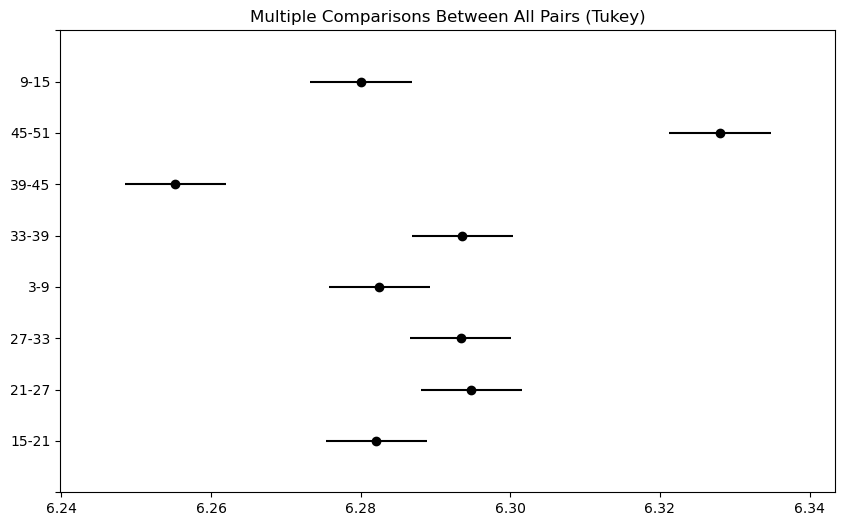

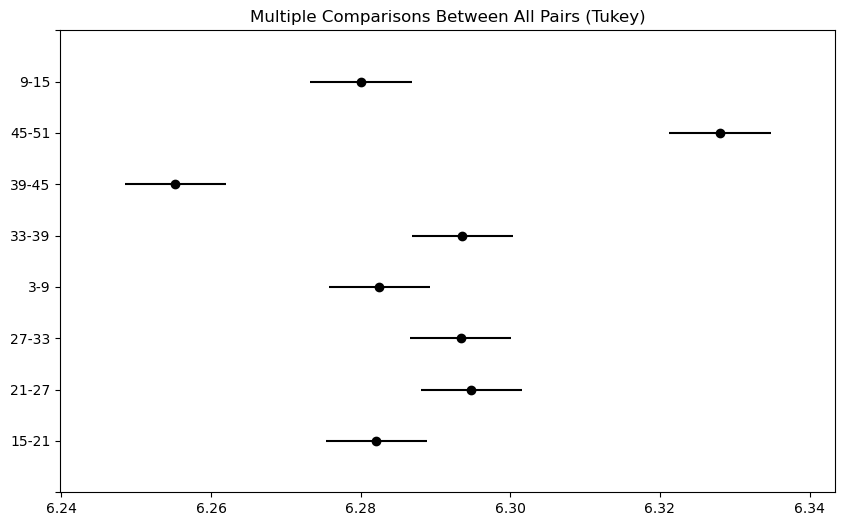

In [113]:
tukey.plot_simultaneous() 

### Tukey HSD - informativity

In [88]:
tukey = pairwise_tukeyhsd(endog=df['mean_infor'],      
                          groups=df['ages'],             
                          alpha=0.05)                      


print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 15-21  21-27   0.0298    0.0   0.022  0.0377   True
 15-21  27-33   0.0488    0.0   0.041  0.0566   True
 15-21    3-9  -0.1139    0.0 -0.1217 -0.1061   True
 15-21  33-39   0.0131    0.0  0.0052  0.0209   True
 15-21  39-45   0.0094 0.0068  0.0016  0.0172   True
 15-21  45-51  -0.0879    0.0 -0.0957 -0.0801   True
 15-21   9-15  -0.0537    0.0 -0.0615 -0.0458   True
 21-27  27-33    0.019    0.0  0.0112  0.0268   True
 21-27    3-9  -0.1437    0.0 -0.1515 -0.1359   True
 21-27  33-39  -0.0168    0.0 -0.0246  -0.009   True
 21-27  39-45  -0.0205    0.0 -0.0283 -0.0126   True
 21-27  45-51  -0.1178    0.0 -0.1256 -0.1099   True
 21-27   9-15  -0.0835    0.0 -0.0913 -0.0757   True
 27-33    3-9  -0.1627    0.0 -0.1705 -0.1549   True
 27-33  33-39  -0.0358    0.0 -0.0436 -0.0279   True
 27-33  39-45  -0.0394    0.0 -0.0473 -0.0316 

/tmp/ipykernel_24360/775879079.py:11: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.swarmplot(x='ages', y='mean_infor', hue='ages', data=filtered_data_infor, size=4, palette=custom_palette, order=agebins, edgecolor='gray',hue_order=agebins)


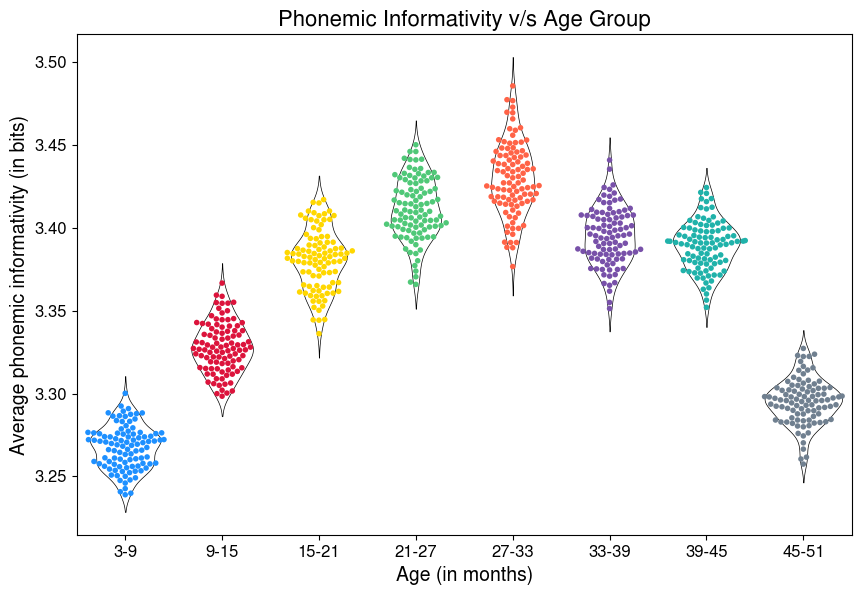

In [17]:


with plt.rc_context({
    'font.size': 12,        # General font size
    'axes.titlesize': 16,   # Font size for the title
    'axes.labelsize': 14,   # Font size for x and y labels
    'xtick.labelsize': 12,  # Font size for x-axis tick labels
    'ytick.labelsize': 12,  # Font size for y-axis tick labels
    'font.family': 'Nimbus Sans'  # Font family
}):
    plt.figure(figsize=(10, 6.5))
    sns.violinplot(x='ages', y='mean_infor', data=filtered_data_infor, order=agebins, inner=None,linewidth=0.5,color='white', edgecolor='black')  # inner=None to remove the inner bars inside the violins
    sns.swarmplot(x='ages', y='mean_infor', hue='ages', data=filtered_data_infor, size=4, palette=custom_palette, order=agebins, edgecolor='gray',hue_order=agebins)


    plt.xlabel('Age (in months)')
    plt.ylabel('Average phonemic informativity (in bits)')
    plt.title('Phonemic Informativity v/s Age Group')
 

    plt.show()


In [7]:
def add_significance_bars(ax, x1, x2, y, significance_level=0.05):
    """Add significance bars to a boxplot."""
    y_offset = 0.0035  # Offset for the bar
    ax.plot([x1, x1, x2, x2], [y, y + y_offset, y + y_offset, y], color='blue')
    ax.text((x1 + x2) / 2, y + y_offset + 0.0001, '*', fontsize=16, ha='center',color='blue')

In [24]:
def add_significance_bars(ax, x1, x2, y, significance_level=0.05):
    """Add significance bars to a boxplot."""
    y_offset = 0.002  # Offset for the bar
    ax.plot([x1, x1, x2, x2], [y, y + y_offset, y + y_offset, y], color='black')
    ax.text((x1 + x2) / 2, y + y_offset+0.0001  , '***', fontsize=26, ha='center',color='black')

In [25]:
means_infor =  [3.268,  
3.328, 
3.382,  
3.412, 
3.431,
3.395,
3.391]


In [26]:
means_lf =  [6.282,  
6.280, 
6.284,  
6.294, 
6.294,
6.297,
6.277]

In [ ]:
with plt.rc_context({
    'font.size': 12,        # General font size
    'axes.titlesize': 20,   # Font size for the title
    'axes.labelsize': 22,   # Font size for x and y labels
    'xtick.labelsize': 20,  # Font size for x-axis tick labels
    'ytick.labelsize': 20,  # Font size for y-axis tick labels
    'font.family': 'Arial'  # Font family
}):
 
    plt.figure(figsize=(13, 6))

    ax = sns.boxplot(x='ages', y='mean_infor', data=filtered_data_infor, order=agebins, 
                  linewidth=1.5, fliersize=0,color='white', boxprops=dict(edgecolor='black'),whiskerprops=dict(color='black'),capprops=dict(color='black'))   


    sns.swarmplot(x='ages', y='mean_infor', hue='ages', data=filtered_data_infor, size=6, 
                  palette=custom_palette, order=agebins, edgecolor='black', dodge=False,alpha=0.8,hue_order=agebins)
    
    for i in range(4):
        add_significance_bars(ax, i, i +0.7, 3.4+i/40)
    add_significance_bars(ax, 4.5, 5, 3.4+3/40)
        
    for i in range(7):
        plt.annotate(str(means_infor[i]), fontweight='bold', xytext=(i+0.04, means_infor[i]+0.052),xy=(i+0.04, means_infor[i]+0.05),fontsize=18)
 
    plt.xlabel('Age of child (months)', fontweight="bold",labelpad=20)
    plt.ylabel('Average informativity (bits)', fontweight="bold",labelpad=20)
    plt.xticks(ticks=[i for i in range(7)], labels=inclusive_labels )
    plt.legend().set_visible(False) 
    plt.savefig('informativity_boxplot.pdf', format='pdf',bbox_inches='tight')
    plt.show()


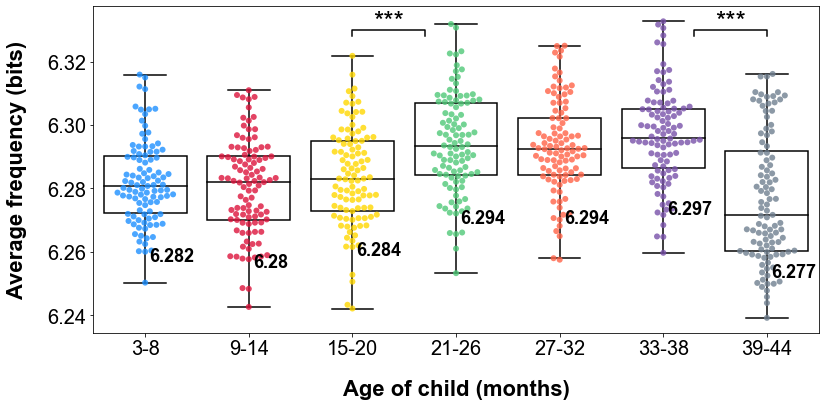

In [30]:
with plt.rc_context({
    'font.size': 12,        # General font size
    'axes.titlesize': 20,   # Font size for the title
    'axes.labelsize': 22,   # Font size for x and y labels
    'xtick.labelsize': 20,  # Font size for x-axis tick labels
    'ytick.labelsize': 20,  # Font size for y-axis tick labels
    'font.family': 'Arial'  # Font family
}):
    plt.figure(figsize=(13,6))

    ax = sns.boxplot(x='ages', y='mean_logfreq', data=filtered_data_logfreq, order=agebins, 
                  linewidth=1.5, fliersize=0,color='white',boxprops=dict(edgecolor='black'),whiskerprops=dict(color='black'),capprops=dict(color='black'))   
    for line in ax.lines:
        line.set_color('black')   

    ax2 = sns.swarmplot(x='ages', y='mean_logfreq', hue='ages', data=filtered_data_logfreq, size=6, 
                  palette=custom_palette, order=agebins, edgecolor='black', dodge=False,alpha=0.8,hue_order=agebins)
    ax2.legend_.remove()
    
    
    add_significance_bars(ax, 2, 2.7, 6.328)
    add_significance_bars(ax, 5.3, 6, 6.328)
    
    for i in range(7):
        plt.annotate(str(means_lf[i]), fontweight='bold', xytext=(i+0.04, means_lf[i]-0.025),xy=(i+0.04, means_lf[i]-0.025),fontsize=18)
    
    plt.xlabel('Age of child (months)', fontweight="bold",labelpad=20)
    plt.ylabel('Average frequency (bits)', fontweight="bold",labelpad=20)
    plt.xticks(ticks=[i for i in range(7)], labels=inclusive_labels )
    plt.savefig('relfreq_boxplot.pdf', format='pdf',bbox_inches='tight')
    plt.show()


In [14]:
df

,ages,sample_no,sample_index,mean_infor,mean_logfreq
0,3-9,100,0,3.289338,6.284536
1,3-9,100,1,3.255210,6.275662
2,3-9,100,2,3.272207,6.311321
3,3-9,100,3,3.260396,6.268527
4,3-9,100,4,3.256225,6.260214
...,...,...,...,...,...
695,39-45,100,95,3.392999,6.247785
696,39-45,100,96,3.404180,6.289712
697,39-45,100,97,3.371525,6.262628
698,39-45,100,98,3.405834,6.266080


In [18]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Example data
data = df.copy()  

# Map ordinal levels to numeric values
data['ordinal_numeric'] = data['ages'].map({'3-9': 1, '9-15': 2, '15-21': 3,'21-27': 4, '27-33': 5, '33-39': 6,'39-45':7})

# Fit a linear model
model = ols('mean_infor ~ ordinal_numeric', data=data).fit()
anova_results = anova_lm(model)
print(anova_results)

                    df    sum_sq   mean_sq           F         PR(>F)
ordinal_numeric    1.0  1.088438  1.088438  745.035822  3.472625e-112
Residual         698.0  1.019722  0.001461         NaN            NaN


In [22]:
data_shuffled = df_shuffled.copy()  

# Map ordinal levels to numeric values
data_shuffled['ordinal_numeric'] = data_shuffled['ages'].map({'3-9': 1, '9-15': 2, '15-21': 3,'21-27': 4, '27-33': 5, '33-39': 6,'39-45':7})

# Fit a linear model
model = ols('mean_infor ~ ordinal_numeric', data=data_shuffled).fit()
anova_results = anova_lm(model)
print(anova_results)

                    df    sum_sq   mean_sq         F    PR(>F)
ordinal_numeric    1.0  0.000105  0.000105  0.034649  0.852387
Residual         698.0  2.108056  0.003020       NaN       NaN


## Scrambling experiment

In [31]:
df_shuffled = df.copy() 
df_shuffled['original_age'] = df_shuffled['ages']
df_shuffled['ages'] = np.random.RandomState(seed=0).permutation(df['ages'].values)

In [73]:
df_shuffled

,ages,sample_no,sample_index,mean_infor,mean_logfreq,original_age
0,21-27,100,0,3.289338,6.284536,3-9
1,39-45,100,1,3.255210,6.275662,3-9
2,3-9,100,2,3.272207,6.311321,3-9
3,27-33,100,3,3.260396,6.268527,3-9
4,3-9,100,4,3.256225,6.260214,3-9
...,...,...,...,...,...,...
695,21-27,100,95,3.392999,6.247785,39-45
696,9-15,100,96,3.404180,6.289712,39-45
697,39-45,100,97,3.371525,6.262628,39-45
698,33-39,100,98,3.405834,6.266080,39-45


In [34]:
replacement_dict = dict(zip(agebins, inclusive_labels))
df_shuffled['inclusive_labels'] = df_shuffled['original_age'].replace(replacement_dict)

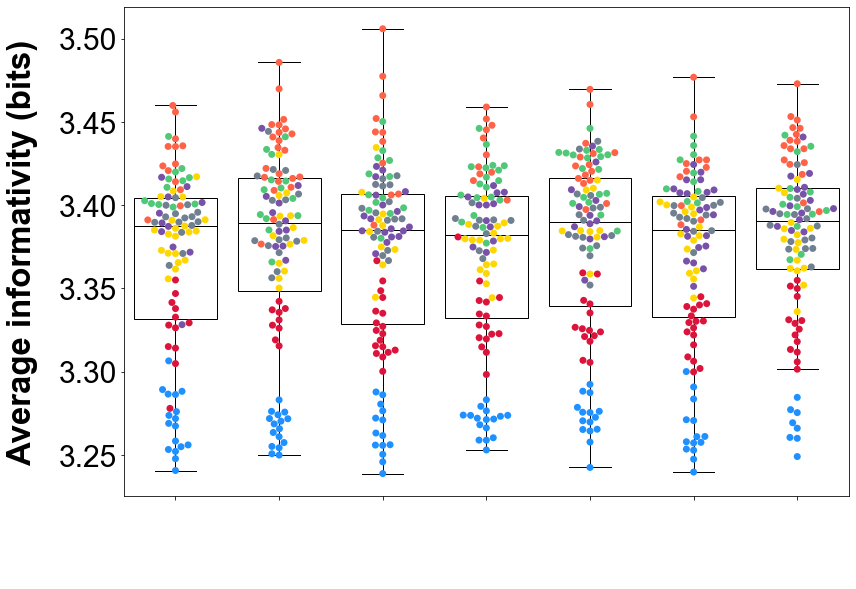

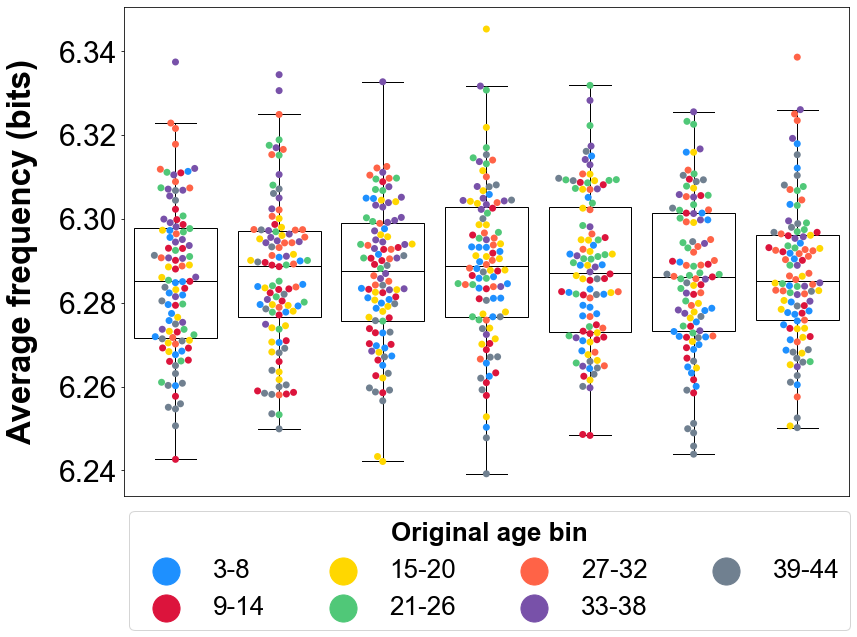

In [35]:
with plt.rc_context({
    'font.size': 28,        # General font size
    'axes.titlesize': 30,   # Font size for the title
    'axes.labelsize': 33,   # Font size for x and y labels
    'xtick.labelsize': 30,  # Font size for x-axis tick labels
    'ytick.labelsize': 30,  # Font size for y-axis tick labels
    'font.family': 'Arial'  # Font family
}):
    plt.figure(figsize=(13,9))


    ax = sns.boxplot(x='ages', y='mean_infor', data=df_shuffled,   
                  linewidth=1, fliersize=0,color='white',boxprops=dict(edgecolor='black'),whiskerprops=dict(color='black'),capprops=dict(color='black'))   
    for line in ax.lines:
        line.set_color('black')   

    ax2 = sns.swarmplot(x='ages', y='mean_infor', hue='original_age', data=df_shuffled, size=7, 
                     edgecolor='gray', dodge=False,palette=custom_palette)
    
    plt.ylabel('Average informativity (bits)', fontweight="bold",labelpad=20)
    #plt.xticks([])
    plt.xlabel('')
    plt.legend().set_visible(False)
    #plt.gca().tick_params(axis='x', labelbottom=False) 
    #legend = plt.legend(loc='lower left', bbox_to_anchor=(-0.08, -0.3), title='Original age bin',ncol=4,markerscale=3.5)
    #legend.get_title().set_fontweight('bold')
    plt.xticks(color='white') 
    plt.xlabel('Hi', fontweight="bold",labelpad=20, color='white')
    plt.savefig('infor_fullscramble.pdf', format='pdf',bbox_inches='tight')
    plt.show()

    
with plt.rc_context({
    'font.size': 26,        # General font size
    'axes.titlesize': 30,   # Font size for the title
    'axes.labelsize': 33,   # Font size for x and y labels
    'xtick.labelsize': 30,  # Font size for x-axis tick labels
    'ytick.labelsize': 30,  # Font size for y-axis tick labels
    'font.family': 'Arial'  # Font family
}):
 
    plt.figure(figsize=(13,9))

    ax = sns.boxplot(x='ages', y='mean_logfreq', data=df_shuffled, order=agebins, 
                  linewidth=1, fliersize=0,color='white',boxprops=dict(edgecolor='black'),whiskerprops=dict(color='black'),capprops=dict(color='black'))   

    for line in ax.lines:
        line.set_color('black') 
    
    sns.swarmplot(x='ages', y='mean_logfreq', hue='inclusive_labels', data=df_shuffled, size=7, 
                    order=agebins, edgecolor='gray', dodge=False,palette=custom_palette)
    plt.legend().set_visible(False)
    plt.xticks([])
    plt.xlabel('Hi', fontweight="bold",labelpad=20, color='white')
    plt.ylabel('Average frequency (bits)', fontweight="bold",labelpad=20)
    legend = plt.legend(loc='lower left', bbox_to_anchor=(-0.01, -0.3), title='Original age bin',ncol=4,markerscale=3.5)
    legend.get_title().set_fontweight('bold')
    plt.savefig('relfreq_fullscramble.pdf', format='pdf',bbox_inches='tight')
    plt.show()

### ANOVA testing: scrambled datapoints

In [8]:
mean_logfreq_samples_shuffled = []

for age in agebins:
    subset_age = df_shuffled[df_shuffled['ages'] == age]
    mean_logfreq_samples_shuffled.append(subset_age['mean_logfreq'])
    
f_stat, p_val = scipy.stats.f_oneway(*mean_logfreq_samples_shuffled, axis=0)

In [9]:
k = 7  # Number of groups
N = 700  # Total number of observations
df_between = k - 1
df_within = N - k

# Calculate partial eta squared
eta_squared = (f_stat * df_between) / ((f_stat * df_between) + df_within)
print(f_stat, p_val, eta_squared)

0.4066167182965258 0.8748535816792806 0.003508140689541316


In [11]:
mean_infor_samples_shuffled = []

for age in agebins:
    subset_age = df_shuffled[df_shuffled['ages'] == age]
    mean_infor_samples_shuffled.append(subset_age['mean_infor'])
    
f_stat, p_val = scipy.stats.f_oneway(*mean_infor_samples_shuffled, axis=0)
eta_squared = (f_stat * df_between) / ((f_stat * df_between) + df_within)
print(f_stat, p_val, eta_squared)

0.8715221991538198 0.5153568807956386 0.007489136368452151


### Finding problematic phonemes?

In [45]:
filtered_data_logfreq

,ages,sample_no,sample_index,mean_infor,mean_logfreq
201,15-21,100,1,3.398861,6.279124
202,15-21,100,2,3.360447,6.267972
203,15-21,100,3,3.360596,6.304451
204,15-21,100,4,3.387494,6.304176
205,15-21,100,5,3.410144,6.315879
...,...,...,...,...,...
195,9-15,100,95,3.324834,6.299811
196,9-15,100,96,3.329334,6.288036
197,9-15,100,97,3.328086,6.271789
198,9-15,100,98,3.300279,6.273026


In [50]:
expected_indices = set(range(100))

# Initialize a dictionary to store missing indices for each age
missing_per_age = {}

# Group by ages and check missing indices
for age, group in filtered_data_logfreq.groupby('ages'):
    present_indices = set(group['sample_index'].unique())
    missing_indices = expected_indices - present_indices
    if missing_indices:  # If there are missing indices
        missing_per_age[age] = sorted(missing_indices)

# Convert the result into a DataFrame for better readability
missing_indices_df = pd.DataFrame([
    {'age': age, 'missing_indices': indices}
    for age, indices in missing_per_age.items()
])


In [49]:
missing_indices_df

,age,missing_indices
0,15-21,"[0, 15, 30]"
1,21-27,[31]
2,27-33,"[59, 70, 83]"
3,3-9,"[14, 93]"
4,33-39,"[11, 25, 26, 29, 45, 84, 92, 97]"
5,39-45,"[7, 24, 36, 47, 76, 78, 96, 97]"
6,45-51,"[16, 24, 37, 65]"
7,9-15,"[24, 35, 78, 91]"


In [54]:
missing_indices_df.to_dict()

{'age': {0: '15-21',
  1: '21-27',
  2: '27-33',
  3: '3-9',
  4: '33-39',
  5: '39-45',
  6: '45-51',
  7: '9-15'},
 'missing_indices': {0: [0, 15, 30],
  1: [31],
  2: [59, 70, 83],
  3: [14, 93],
  4: [11, 25, 26, 29, 45, 84, 92, 97],
  5: [7, 24, 36, 47, 76, 78, 96, 97],
  6: [16, 24, 37, 65],
  7: [24, 35, 78, 91]}}

The above samples are considered outliers based on frequency, as they lie more than 1.5IQR away from the quartiles

In [51]:
missing_filenames = []

# Iterate through each row in the DataFrame
for _, row in missing_indices_df.iterrows():
    age = row['age']
    missing_indices = row['missing_indices']
    
    # Generate filenames for each missing index
    filenames = [f"sample_{index}_age_{age}_phonemic.csv" for index in missing_indices]
    missing_filenames.extend(filenames)

In [53]:
len(missing_filenames)

33

Now we need to construct these samples again by randomly drawing again

In [1]:
data_path = None  # Path to the data directory of bootstrap backend  

# Function to identify outliers using the IQR method
def find_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Loop through each file and analyze
outlier_summary = []

for filename in missing_filenames:
    filepath = data_path + filename
    
    try:
        # Read the CSV
        phonemedf = pd.read_csv(filepath)
        
        # Check for outliers in 'info_values'
        outliers = find_outliers(phonemedf, 'info_values')
        
        # Visualize data distribution for 'info_values'
        plt.figure(figsize=(8, 6))
        plt.hist(phonemedf['info_values'], bins=20, alpha=0.7, edgecolor='black')
        plt.title(f'Distribution of info_values in {filename}')
        plt.xlabel('info_values')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
        
        # Record outlier details
        if not outliers.empty:
            outlier_summary.append({
                'filename': filename,
                'num_outliers': len(outliers),
                'outliers': outliers.to_dict('records')
            })
    
    except Exception as e:
        print(f"Error processing file {filename}: {e}")

# Convert the outlier summary to a DataFrame for reporting
outlier_summary_df = pd.DataFrame(outlier_summary)
 

NameError: name 'missing_filenames' is not defined

In [15]:
outlier_summary_df

,filename,num_outliers,outliers
0,sample_7_age_15-21_phonemic.csv,2,"[{'phoneme': 'ɔj', 'freq_values': 9.7199057083..."
1,sample_84_age_33-39_phonemic.csv,1,"[{'phoneme': 'g', 'freq_values': 8.55053303695..."
2,sample_7_age_39-45_phonemic.csv,1,"[{'phoneme': 'ɔj', 'freq_values': 9.4347173197..."
3,sample_15_age_39-45_phonemic.csv,1,"[{'phoneme': 'ɔj', 'freq_values': 9.7357430566..."
4,sample_24_age_39-45_phonemic.csv,2,"[{'phoneme': 'g', 'freq_values': 8.35723143342..."
5,sample_36_age_39-45_phonemic.csv,1,"[{'phoneme': 'ɔj', 'freq_values': 9.6613683854..."
6,sample_47_age_39-45_phonemic.csv,1,"[{'phoneme': 'ɔj', 'freq_values': 9.7818585830..."
7,sample_67_age_39-45_phonemic.csv,2,"[{'phoneme': 'g', 'freq_values': 8.58412538652..."
8,sample_76_age_39-45_phonemic.csv,1,"[{'phoneme': 'ɔj', 'freq_values': 9.5910859502..."
9,sample_78_age_39-45_phonemic.csv,1,"[{'phoneme': 'ɔj', 'freq_values': 9.9480822829..."


In [2]:
outlier_summary = []

for filename in missing_filenames:
    filepath = data_path + filename
    
    try:
        # Read the CSV
        phonemedf = pd.read_csv(filepath)
        
        # Check for outliers in 'info_values'
        outliers = find_outliers(phonemedf, 'freq_values')
        
        # Visualize data distribution for 'info_values'
        plt.figure(figsize=(8, 6))
        plt.hist(phonemedf['freq_values'], bins=20, alpha=0.7, edgecolor='black')
        plt.title(f'Distribution of logfreq in {filename}')
        plt.xlabel('freq_values')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
        
        # Record outlier details
        if not outliers.empty:
            outlier_summary.append({
                'filename': filename,
                'num_outliers': len(outliers),
                'outliers': outliers.to_dict('records')
            })
    
    except Exception as e:
        print(f"Error processing file {filename}: {e}")

# Convert the outlier summary to a DataFrame for reporting
outlier_summary_df = pd.DataFrame(outlier_summary)

NameError: name 'missing_filenames' is not defined

In [19]:
outlier_summary_df

,filename,num_outliers,outliers
0,sample_7_age_15-21_phonemic.csv,2,"[{'phoneme': 'ʒ', 'freq_values': 12.6044284909..."
1,sample_30_age_15-21_phonemic.csv,1,"[{'phoneme': 'ʒ', 'freq_values': 11.6612080315..."
2,sample_12_age_27-33_phonemic.csv,2,"[{'phoneme': 'ʔ', 'freq_values': 14.3053670970..."
3,sample_44_age_3-9_phonemic.csv,2,"[{'phoneme': 'ʒ', 'freq_values': 11.8461848577..."
4,sample_11_age_33-39_phonemic.csv,1,"[{'phoneme': 'ʒ', 'freq_values': 11.3985833835..."
5,sample_17_age_33-39_phonemic.csv,2,"[{'phoneme': 'ʒ', 'freq_values': 11.9834746304..."
6,sample_31_age_33-39_phonemic.csv,2,"[{'phoneme': 'ʒ', 'freq_values': 12.1356558519..."
7,sample_84_age_33-39_phonemic.csv,1,"[{'phoneme': 'ʒ', 'freq_values': 11.9131031163..."
8,sample_92_age_33-39_phonemic.csv,1,"[{'phoneme': 'ʒ', 'freq_values': 12.3054739791..."
9,sample_7_age_39-45_phonemic.csv,1,"[{'phoneme': 'ʒ', 'freq_values': 11.7815200832..."


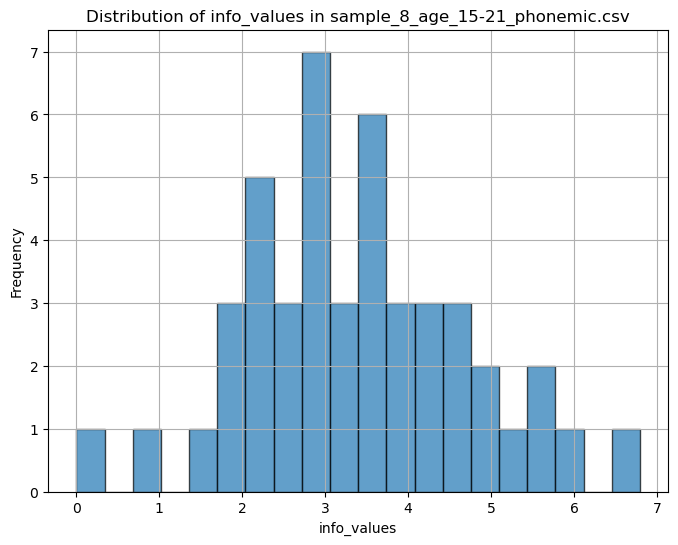

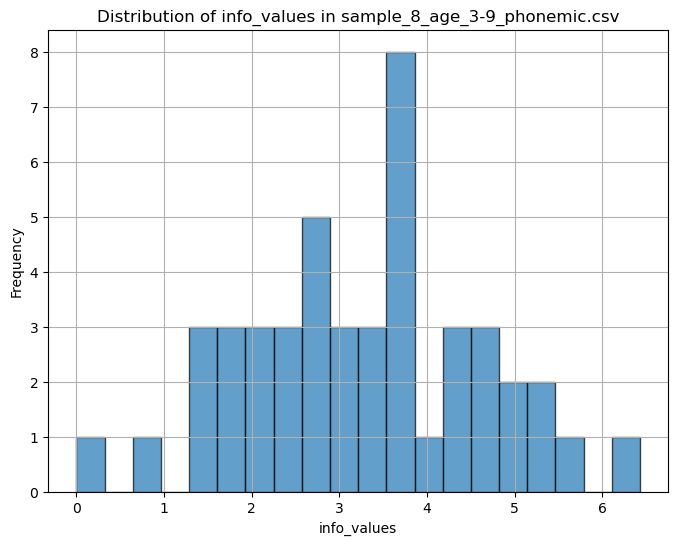

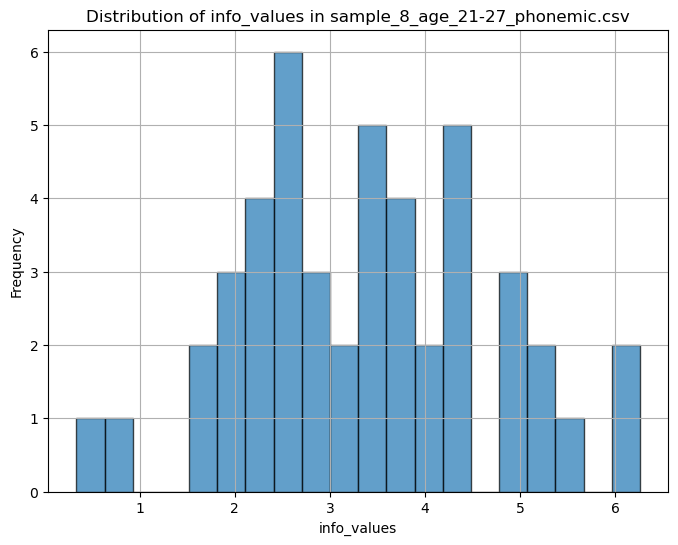

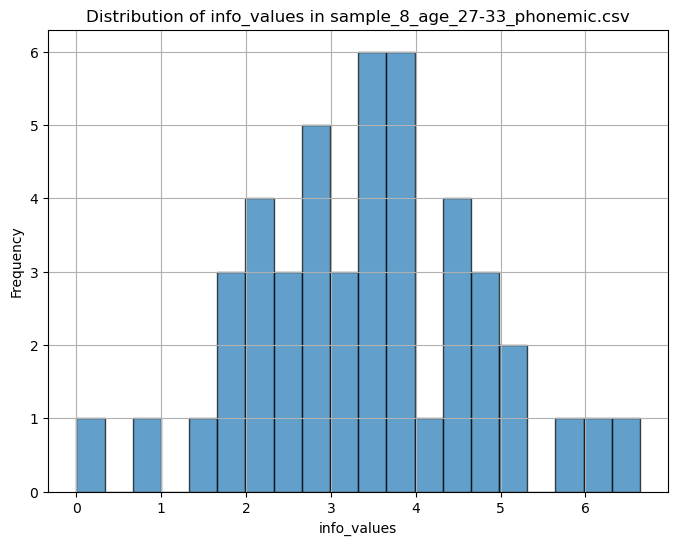

In [16]:
## REGULAR CASE

outlier_summary = []
regular_filenames = ['sample_8_age_15-21_phonemic.csv','sample_8_age_3-9_phonemic.csv','sample_8_age_21-27_phonemic.csv','sample_8_age_27-33_phonemic.csv']
for filename in regular_filenames:
    filepath = data_path + filename
    
    try:
        # Read the CSV
        phonemedf = pd.read_csv(filepath)
        
        # Check for outliers in 'info_values'
        outliers = find_outliers(phonemedf, 'info_values')
        
        # Visualize data distribution for 'info_values'
        plt.figure(figsize=(8, 6))
        plt.hist(phonemedf['info_values'], bins=20, alpha=0.7, edgecolor='black')
        plt.title(f'Distribution of info_values in {filename}')
        plt.xlabel('info_values')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
        
        # Record outlier details
        if not outliers.empty:
            outlier_summary.append({
                'filename': filename,
                'num_outliers': len(outliers),
                'outliers': outliers.to_dict('records')
            })
    
    except Exception as e:
        print(f"Error processing file {filename}: {e}")

# Convert the outlier summary to a DataFrame for reporting
outlier_summary_df = pd.DataFrame(outlier_summary)

In [ ]:
folder_path = data_path 

filenames = [f for f in os.listdir(folder_path) if f.endswith("_phonemic.csv")]

# Function to identify outliers using the IQR method
def find_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Loop through each file and analyze
outlier_summary = []

for filename in filenames:
    filepath =  data_path+filename
    
    try:
        # Read the CSV
        phonemedf = pd.read_csv(filepath)
        
        # Check for outliers in 'info_values'
        outliers = find_outliers(phonemedf, 'info_values')
        
        # Visualize data distribution for 'info_values'
        plt.figure(figsize=(8, 6))
        plt.hist(phonemedf['info_values'], bins=20, alpha=0.7, edgecolor='black')
        plt.title(f'Distribution of info_values in {filename}')
        plt.xlabel('info_values')
        plt.ylabel('Frequency')
        plt.grid(True)
        #plt.show()
        
        # Record outlier details
        if not outliers.empty:
            outlier_summary.append({
                'filename': filename,
                'num_outliers': len(outliers),
                'outliers': outliers.to_dict('records')
            })
    
    except Exception as e:
        print(f"Error processing file {filename}: {e}")

# Convert the outlier summary to a DataFrame for reporting
outlier_summary_df = pd.DataFrame(outlier_summary)
 

In [61]:
outlier_summary_df

,filename,num_outliers,outliers
0,sample_1_age_27-33_phonemic.csv,1,"[{'phoneme': 'ɔj', 'freq_values': 10.305634287..."
1,sample_0_age_39-45_phonemic.csv,1,"[{'phoneme': 'ɔj', 'freq_values': 9.6330308240..."
2,sample_1_age_39-45_phonemic.csv,2,"[{'phoneme': 'ɔj', 'freq_values': 9.5776603988..."
3,sample_3_age_21-27_phonemic.csv,1,"[{'phoneme': 'ʔ', 'freq_values': 12.8461848577..."
4,sample_2_age_39-45_phonemic.csv,3,"[{'phoneme': 'g', 'freq_values': 8.42263497320..."
...,...,...,...
214,sample_75_age_33-39_phonemic.csv,1,"[{'phoneme': 'g', 'freq_values': 8.53075816994..."
215,sample_77_age_15-21_phonemic.csv,1,"[{'phoneme': 'ʔ', 'freq_values': 14.3055452295..."
216,sample_84_age_33-39_phonemic.csv,1,"[{'phoneme': 'g', 'freq_values': 8.55053303695..."
217,sample_88_age_33-39_phonemic.csv,1,"[{'phoneme': 'ʔ', 'freq_values': 15.3053492825..."


## Shuffling -- keeping distributions intact, changing x-label order

In [36]:
randomized_age_order = np.random.RandomState(seed=0).permutation(agebins)

In [37]:
randomized_age_rows = [i for i in randomized_age_order for n in range(100) ]

In [38]:
df_shuffled = df.copy()
df_shuffled['original_age'] = df_shuffled['ages'].astype('category')
df_shuffled['ages'] = randomized_age_rows
#df_shuffled['ages'] =df_shuffled['ages'].astype('category')
df_shuffled['ages'] = pd.Categorical(df_shuffled['ages'], categories=agebins, ordered=True)
df_shuffled['original_age'] = pd.Categorical(df_shuffled['original_age'], categories=agebins, ordered=True)

In [11]:
df_shuffled

,ages,sample_no,sample_index,mean_infor,mean_logfreq,original_age
0,39-45,100,0,3.289338,6.284536,3-9
1,39-45,100,1,3.255210,6.275662,3-9
2,39-45,100,2,3.272207,6.311321,3-9
3,39-45,100,3,3.260396,6.268527,3-9
4,39-45,100,4,3.256225,6.260214,3-9
...,...,...,...,...,...,...
695,27-33,100,95,3.392999,6.247785,39-45
696,27-33,100,96,3.404180,6.289712,39-45
697,27-33,100,97,3.371525,6.262628,39-45
698,27-33,100,98,3.405834,6.266080,39-45


In [39]:
randomized_age_order = list(randomized_age_order)
age_order = list(agebins)

category_series_random = pd.Series(randomized_age_order)

category_series_random  = pd.Categorical(category_series_random,ordered=True)

category_series  = pd.Series(age_order)

category_series   = pd.Categorical(category_series,ordered=True)

In [40]:
df_sorted_shuffled = df_shuffled.sort_values(by='ages')
sorted_original_age = df_sorted_shuffled['original_age']

In [41]:
list_of_ticks = sorted_original_age.unique()

In [42]:
list_of_ticks

['27-33', '15-21', '9-15', '21-27', '39-45', '33-39', '3-9']
Categories (7, object): ['3-9' < '9-15' < '15-21' < '21-27' < '27-33' < '33-39' < '39-45']

In [44]:
list_of_ticks_inclusive = [replacement_dict.get(name, name) for name in list_of_ticks]

In [45]:
list_of_ticks_inclusive

['27-32', '15-20', '9-14', '21-26', '39-44', '33-38', '3-8']

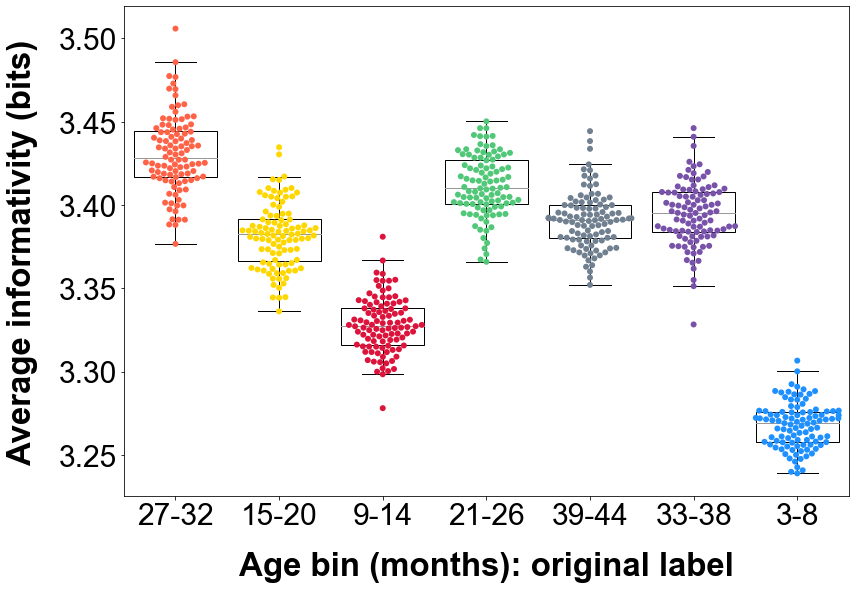

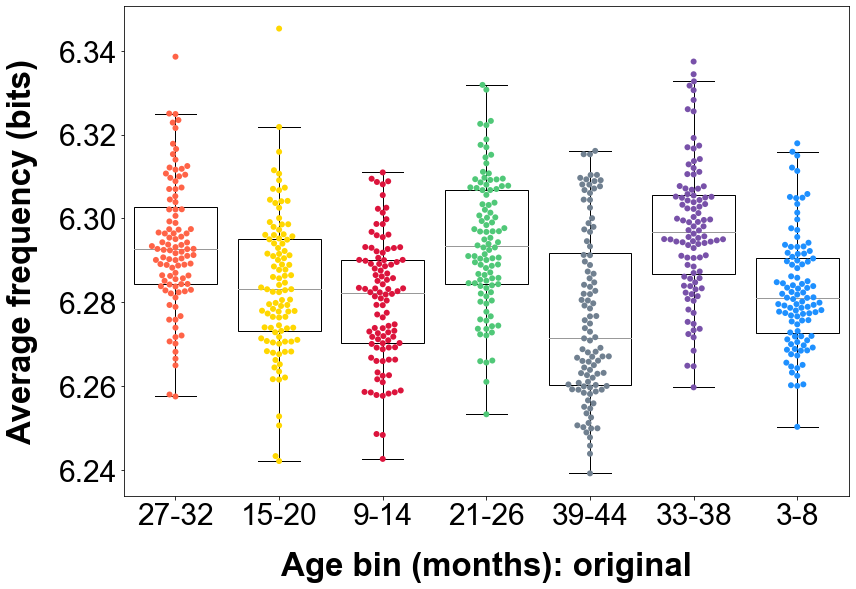

In [48]:
with plt.rc_context({
    'font.size': 30,        # General font size
    'axes.titlesize': 30,   # Font size for the title
    'axes.labelsize': 33,   # Font size for x and y labels
    'xtick.labelsize': 30,  # Font size for x-axis tick labels
    'ytick.labelsize': 30,  # Font size for y-axis tick labels
    'font.family': 'Arial'  # Font family
}):
 
    plt.figure(figsize=(13,9))


    sns.boxplot(x='ages', y='mean_infor', data=df_shuffled, order=agebins, 
                  linewidth=1, fliersize=0,color='white',boxprops=dict(edgecolor='black'),whiskerprops=dict(color='black'),capprops=dict(color='black'))   


    sns.swarmplot(x='ages', y='mean_infor', hue='original_age', data=df_shuffled, size=6, 
                  palette=custom_palette, order=agebins, edgecolor='gray', dodge=False)

    plt.xlabel('Age bin (months): original label',fontweight="bold",labelpad=20)
    plt.ylabel('Average informativity (bits)',fontweight="bold",labelpad=20)
    #plt.title('Informativity v/s Age (reordered)')
    plt.xticks(ticks=range(7), labels=list_of_ticks_inclusive)
    plt.legend().set_visible(False)  # Hides the legend
    plt.savefig('info_rearranged_intact.pdf', format='pdf',bbox_inches='tight')
    plt.show()
    
with plt.rc_context({
    'font.size': 30,        # General font size
    'axes.titlesize': 30,   # Font size for the title
    'axes.labelsize': 33,   # Font size for x and y labels
    'xtick.labelsize': 30,  # Font size for x-axis tick labels
    'ytick.labelsize': 30,  # Font size for y-axis tick labels
    'font.family': 'Arial'  # Font family
}):
    plt.figure(figsize=(13,9))

   

    sns.boxplot(x='ages', y='mean_logfreq', data=df_shuffled, order=agebins, 
                  linewidth=1, fliersize=0,color='white',boxprops=dict(edgecolor='black'),whiskerprops=dict(color='black'),capprops=dict(color='black'))   


    sns.swarmplot(x='ages', y='mean_logfreq', hue='original_age', data=df_shuffled, size=6, 
                  palette=custom_palette, order=agebins, edgecolor='gray', dodge=False)

    plt.xlabel('Age bin (months): original',fontweight="bold",labelpad=20)
    plt.ylabel('Average frequency (bits)',fontweight="bold",labelpad=20)
    #plt.title('Relative frequency v/s Age (reordered)')
    plt.xticks(ticks=range(7), labels=list_of_ticks_inclusive)
    plt.legend().set_visible(False)  # Hides the legend
    plt.savefig('freq_rearranged_intact.pdf', format='pdf',bbox_inches='tight')
    plt.show()

In [121]:
mean_logfreq_samples_shuffled = []

for age in agebins:
    subset_age = df_shuffled[df_shuffled['ages'] == age]
    mean_logfreq_samples_shuffled.append(subset_age['mean_logfreq'])
    
scipy.stats.f_oneway(*mean_logfreq_samples_shuffled, axis=0)

F_onewayResult(statistic=39.94546058468349, pvalue=3.35595984417655e-48)

In [122]:
mean_infor_samples_shuffled = []

for age in agebins:
    subset_age = df_shuffled[df_shuffled['ages'] == age]
    mean_infor_samples_shuffled.append(subset_age['mean_infor'])
    
scipy.stats.f_oneway(*mean_infor_samples_shuffled, axis=0)

F_onewayResult(statistic=872.9565136514947, pvalue=0.0)

In [57]:
tick_reordering = list_of_ticks

In [64]:
tick_reordering

['27-33', '15-21', '9-15', '21-27', '39-45', '33-39', '3-9']
Categories (7, object): ['3-9' < '9-15' < '15-21' < '21-27' < '27-33' < '33-39' < '39-45']

In [67]:
results = []
for i in range(len(list_of_ticks)-1):
        j = i+1
        data1 = df_shuffled[df_shuffled['original_age'] == tick_reordering[i]]['mean_infor']
        data2 = df_shuffled[df_shuffled['original_age'] == tick_reordering[j]]['mean_infor']
        stat, p = stats.ttest_ind(data1, data2)
        
        bonferroni_alpha = 0.05 / 6 #changed to 7 from 28
        significant = p < bonferroni_alpha
        
        mean_diff = data1.mean() - data2.mean() 
        results.append((tick_reordering[i], tick_reordering[j], stat, p, mean_diff,significant))

# Convert results to DataFrame for easier viewing
bonfresults_df = pd.DataFrame(results, columns=['Group 1', 'Group 2', 'Statistic', 'P-value', 'Group1-Group2 Mean','Significant'])
print(bonfresults_df)

  Group 1 Group 2  Statistic        P-value  Group1-Group2 Mean  Significant
0   27-33   15-21  16.215255   3.490641e-38            0.048823         True
1   15-21    9-15  21.027679   2.396159e-52            0.053651         True
2    9-15   21-27 -33.605124   9.627873e-84           -0.083494         True
3   21-27   39-45   8.176895   3.441442e-14            0.020459         True
4   39-45   33-39  -1.447086   1.494542e-01           -0.003681        False
5   33-39     3-9  54.350356  5.988933e-121            0.126947         True


In [60]:
df_shuffled

,ages,sample_no,sample_index,mean_infor,mean_logfreq,original_age
0,39-45,100,0,3.289338,6.284536,3-9
1,39-45,100,1,3.255210,6.275662,3-9
2,39-45,100,2,3.272207,6.311321,3-9
3,39-45,100,3,3.260396,6.268527,3-9
4,39-45,100,4,3.256225,6.260214,3-9
...,...,...,...,...,...,...
695,27-33,100,95,3.392999,6.247785,39-45
696,27-33,100,96,3.404180,6.289712,39-45
697,27-33,100,97,3.371525,6.262628,39-45
698,27-33,100,98,3.405834,6.266080,39-45


In [114]:
from scipy.stats import spearmanr

print("ORIGINAL DATA: EACH SAMPLE DISAGGREGATED")
spearmanr(df['ages'], df['mean_infor'])

ORIGINAL DATA: EACH SAMPLE DISAGGREGATED


SignificanceResult(statistic=-0.4557239325314682, pvalue=2.8213669354085493e-42)

In [115]:
print("ORIGINAL DATA: AGGREGATED BY AGE")
spearmanr(summary['age_numeric'], summary['mean_infor'])

ORIGINAL DATA: AGGREGATED BY AGE


SignificanceResult(statistic=0.30952380952380953, pvalue=0.4556448907375822)

In [116]:
age_midpoints =   [i+3 for i in range(3,47,6)]
age_mapping={}
for i in range(len(agebins)):
    age_mapping[agebins[i]] = age_midpoints[i]
df_shuffled['age_numeric'] = df_shuffled['ages'].map(age_mapping)
df['age_numeric'] = df['ages'].map(age_mapping)

In [117]:
print("ORIGINAL DATA: DISAGGREGATED BUT AGE AS A NUMERIC")
spearmanr(df['age_numeric'], df['mean_infor'])

ORIGINAL DATA: DISAGGREGATED BUT AGE AS A NUMERIC


SignificanceResult(statistic=0.2477488187775198, pvalue=1.1813548656128678e-12)

In [118]:
print("SHUFFLED LABELS: DISAGGREGATED BUT AGE AS A NUMERIC")
spearmanr(df_shuffled['age_numeric'], df_shuffled['mean_infor'])

SHUFFLED LABELS: DISAGGREGATED BUT AGE AS A NUMERIC


SignificanceResult(statistic=-0.11433906696863481, pvalue=0.0011970996829075474)

In [119]:
shuffled_summary = df_shuffled.groupby('ages').mean().reset_index()

In [120]:
print("SHUFFLED LABELS: AGGREGATED BY AGE AS A NUMERIC")
spearmanr(shuffled_summary['age_numeric'], shuffled_summary['mean_infor'])

SHUFFLED LABELS: AGGREGATED BY AGE AS A NUMERIC


SignificanceResult(statistic=-0.09523809523809526, pvalue=0.8225054302036114)

In [121]:
from scipy.stats import kendalltau

# Data
values = df ['mean_infor']
groups = df ['age_numeric']  # Treat as ordinal

# Kendall's Tau test
tau, p_value = kendalltau(groups, values)

print("Kendall's Tau:", tau)
print("P-value:", p_value)


Kendall's Tau: 0.1928894458613316
P-value: 1.3152487151090393e-14


In [112]:
df

,ages,sample_no,sample_index,mean_infor,mean_logfreq
0,3-9,100,0,3.289338,6.284536
1,3-9,100,1,3.255210,6.275662
2,3-9,100,2,3.272207,6.311321
3,3-9,100,3,3.260396,6.268527
4,3-9,100,4,3.256225,6.260214
...,...,...,...,...,...
695,39-45,100,95,3.392999,6.247785
696,39-45,100,96,3.404180,6.289712
697,39-45,100,97,3.371525,6.262628
698,39-45,100,98,3.405834,6.266080


In [41]:
stats_table = df.copy()

In [42]:
stats_table.columns = ['ages', 'sample_no', 'sample_index', 'infor','logfreq']

In [115]:
stats_table

,ages,sample_no,sample_index,infor,logfreq
0,3-9,100,0,3.289338,6.284536
1,3-9,100,1,3.255210,6.275662
2,3-9,100,2,3.272207,6.311321
3,3-9,100,3,3.260396,6.268527
4,3-9,100,4,3.256225,6.260214
...,...,...,...,...,...
695,39-45,100,95,3.392999,6.247785
696,39-45,100,96,3.404180,6.289712
697,39-45,100,97,3.371525,6.262628
698,39-45,100,98,3.405834,6.266080


In [44]:
from pandas.api.types import CategoricalDtype

age_order = agebins
age_dtype = CategoricalDtype(categories=age_order, ordered=True)
stats_table['ages'] = stats_table['ages'].astype(age_dtype)

def giveLatexResults(measure):
    agg_funcs = {
        'Mean': (measure, 'mean'),
        'SD': (measure, 'std'),
        'Max': (measure,  'max'),
        'Min': (measure,  'min')
    }

    grouped = stats_table.groupby('ages')
    result_lf = grouped.agg(**agg_funcs).reset_index()
    result_summary = result_lf.sort_values(by='ages').reset_index(drop=True)
    result_summary = result_summary.round(3)
    result_summary.columns =   result_summary.columns[1:].insert(0,"Age bin") 
    return result_summary.to_latex(index=False)
    

In [130]:
print(giveLatexResults('logfreq'))

\begin{tabular}{lrrrr}
\toprule
Age bin &  Mean &    SD &   Max &   Min \\
\midrule
    3-9 & 6.282 & 0.013 & 6.318 & 6.250 \\
   9-15 & 6.280 & 0.015 & 6.311 & 6.243 \\
  15-21 & 6.284 & 0.017 & 6.345 & 6.242 \\
  21-27 & 6.294 & 0.016 & 6.332 & 6.253 \\
  27-33 & 6.294 & 0.015 & 6.339 & 6.258 \\
  33-39 & 6.297 & 0.016 & 6.337 & 6.260 \\
  39-45 & 6.277 & 0.020 & 6.316 & 6.239 \\
\bottomrule
\end{tabular}



In [45]:
print(giveLatexResults('infor'))

\begin{tabular}{lrrrr}
\toprule
Age bin &  Mean &    SD &   Max &   Min \\
\midrule
    3-9 & 3.268 & 0.014 & 3.307 & 3.239 \\
   9-15 & 3.328 & 0.017 & 3.381 & 3.278 \\
  15-21 & 3.382 & 0.019 & 3.435 & 3.336 \\
  21-27 & 3.412 & 0.018 & 3.450 & 3.366 \\
  27-33 & 3.431 & 0.023 & 3.506 & 3.377 \\
  33-39 & 3.395 & 0.019 & 3.446 & 3.328 \\
  39-45 & 3.391 & 0.017 & 3.444 & 3.352 \\
\bottomrule
\end{tabular}



In [118]:
print(result_summary.to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
 ages &  logfreq\_mean &  logfreq\_sd &  logfreq\_range &  infor\_mean &  infor\_sd &  infor\_range \\
\midrule
  3-9 &      6.282432 &    0.013494 &       0.067608 &    3.267794 &  0.013555 &     0.067650 \\
 9-15 &      6.280439 &    0.014798 &       0.068314 &    3.328025 &  0.016629 &     0.102911 \\
15-21 &      6.284198 &    0.016571 &       0.103123 &    3.381677 &  0.019352 &     0.098481 \\
21-27 &      6.294178 &    0.015555 &       0.078541 &    3.411519 &  0.018461 &     0.084289 \\
27-33 &      6.293764 &    0.015197 &       0.081024 &    3.430500 &  0.023067 &     0.129224 \\
33-39 &      6.297448 &    0.015986 &       0.077694 &    3.394741 &  0.019021 &     0.117856 \\
39-45 &      6.276505 &    0.020317 &       0.076896 &    3.391060 &  0.016889 &     0.092266 \\
\bottomrule
\end{tabular}



In [38]:
%pip install jinja2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 6.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
